In [1]:
# Step 1 : Install Pandas
!pip install pandas

In [2]:
# import required libraries
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt # data visualization
import seaborn as sns # statistical data visualization
%matplotlib inline
# import plotly.express as px
# import plotly.graph_objects as go
# import plotly.io as pio
# import itertools



In [3]:
from sklearn.model_selection import train_test_split , GridSearchCV, KFold, cross_val_score, RepeatedStratifiedKFold
from sklearn.preprocessing import MinMaxScaler , StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix, classification_report, ConfusionMatrixDisplay # Import ConfusionMatrixDisplay
from sklearn import metrics

In [4]:
import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

In [5]:
import warnings

warnings.filterwarnings('ignore')

**Data Understanding**

In [6]:
# Step 3 : import data
data_df = pd.read_csv('loan_data_2007_2014.csv')

In [7]:
# display first 5 rows
data_df.head()

,Unnamed: 0,id,member_id,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,...,total_bal_il,il_util,open_rv_12m,open_rv_24m,max_bal_bc,all_util,total_rev_hi_lim,inq_fi,total_cu_tl,inq_last_12m
0,0,1077501,1296599,5000,5000,4975.0,36 months,10.65,162.87,B,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,1,1077430,1314167,2500,2500,2500.0,60 months,15.27,59.83,C,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,2,1077175,1313524,2400,2400,2400.0,36 months,15.96,84.33,C,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,3,1076863,1277178,10000,10000,10000.0,36 months,13.49,339.31,C,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,4,1075358,1311748,3000,3000,3000.0,60 months,12.69,67.79,B,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [8]:
data_df.tail()

,Unnamed: 0,id,member_id,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,...,total_bal_il,il_util,open_rv_12m,open_rv_24m,max_bal_bc,all_util,total_rev_hi_lim,inq_fi,total_cu_tl,inq_last_12m
466280,466280,8598660,1440975,18400,18400,18400.0,60 months,14.47,432.64,C,...,NaN,NaN,NaN,NaN,NaN,NaN,29900.0,NaN,NaN,NaN
466281,466281,9684700,11536848,22000,22000,22000.0,60 months,19.97,582.50,D,...,NaN,NaN,NaN,NaN,NaN,NaN,39400.0,NaN,NaN,NaN
466282,466282,9584776,11436914,20700,20700,20700.0,60 months,16.99,514.34,D,...,NaN,NaN,NaN,NaN,NaN,NaN,13100.0,NaN,NaN,NaN
466283,466283,9604874,11457002,2000,2000,2000.0,36 months,7.90,62.59,A,...,NaN,NaN,NaN,NaN,NaN,NaN,53100.0,NaN,NaN,NaN
466284,466284,9199665,11061576,10000,10000,9975.0,36 months,19.20,367.58,D,...,NaN,NaN,NaN,NaN,NaN,NaN,16000.0,NaN,NaN,NaN


In [9]:
# display info
data_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 466285 entries, 0 to 466284
Data columns (total 75 columns):
 #   Column                       Non-Null Count   Dtype  
---  ------                       --------------   -----  
 0   Unnamed: 0                   466285 non-null  int64  
 1   id                           466285 non-null  int64  
 2   member_id                    466285 non-null  int64  
 3   loan_amnt                    466285 non-null  int64  
 4   funded_amnt                  466285 non-null  int64  
 5   funded_amnt_inv              466285 non-null  float64
 6   term                         466285 non-null  object 
 7   int_rate                     466285 non-null  float64
 8   installment                  466285 non-null  float64
 9   grade                        466285 non-null  object 
 10  sub_grade                    466285 non-null  object 
 11  emp_title                    438697 non-null  object 
 12  emp_length                   445277 non-null  object 
 13 

In [10]:
# mengecek variabel yang masih terdapat nilai null
data_df.isnull().sum()

,0
Unnamed: 0,0
id,0
member_id,0
loan_amnt,0
funded_amnt,0
...,...
all_util,466285
total_rev_hi_lim,70276
inq_fi,466285
total_cu_tl,466285


**Exploratory Data Analysis**

In [11]:
data_df.shape

(466285, 75)

In [12]:
data_df.head()

,Unnamed: 0,id,member_id,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,...,total_bal_il,il_util,open_rv_12m,open_rv_24m,max_bal_bc,all_util,total_rev_hi_lim,inq_fi,total_cu_tl,inq_last_12m
0,0,1077501,1296599,5000,5000,4975.0,36 months,10.65,162.87,B,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,1,1077430,1314167,2500,2500,2500.0,60 months,15.27,59.83,C,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,2,1077175,1313524,2400,2400,2400.0,36 months,15.96,84.33,C,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,3,1076863,1277178,10000,10000,10000.0,36 months,13.49,339.31,C,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,4,1075358,1311748,3000,3000,3000.0,60 months,12.69,67.79,B,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [13]:
col_names = data_df.columns
col_names

Index(['Unnamed: 0', 'id', 'member_id', 'loan_amnt', 'funded_amnt',
       'funded_amnt_inv', 'term', 'int_rate', 'installment', 'grade',
       'sub_grade', 'emp_title', 'emp_length', 'home_ownership', 'annual_inc',
       'verification_status', 'issue_d', 'loan_status', 'pymnt_plan', 'url',
       'desc', 'purpose', 'title', 'zip_code', 'addr_state', 'dti',
       'delinq_2yrs', 'earliest_cr_line', 'inq_last_6mths',
       'mths_since_last_delinq', 'mths_since_last_record', 'open_acc',
       'pub_rec', 'revol_bal', 'revol_util', 'total_acc',
       'initial_list_status', 'out_prncp', 'out_prncp_inv', 'total_pymnt',
       'total_pymnt_inv', 'total_rec_prncp', 'total_rec_int',
       'total_rec_late_fee', 'recoveries', 'collection_recovery_fee',
       'last_pymnt_d', 'last_pymnt_amnt', 'next_pymnt_d', 'last_credit_pull_d',
       'collections_12_mths_ex_med', 'mths_since_last_major_derog',
       'policy_code', 'application_type', 'annual_inc_joint', 'dti_joint',
       'verificatio

In [14]:
# find categorical variables

categorical = [var for var in data_df.columns if data_df[var].dtype=='O']

print('There are {} categorical variables\n'.format(len(categorical)))

print('The categorical variables are :', categorical)

There are 22 categorical variables

The categorical variables are : ['term', 'grade', 'sub_grade', 'emp_title', 'emp_length', 'home_ownership', 'verification_status', 'issue_d', 'loan_status', 'pymnt_plan', 'url', 'desc', 'purpose', 'title', 'zip_code', 'addr_state', 'earliest_cr_line', 'initial_list_status', 'last_pymnt_d', 'next_pymnt_d', 'last_credit_pull_d', 'application_type']


In [15]:
# view the categorical variables

data_df[categorical].head()


,term,grade,sub_grade,emp_title,emp_length,home_ownership,verification_status,issue_d,loan_status,pymnt_plan,...,purpose,title,zip_code,addr_state,earliest_cr_line,initial_list_status,last_pymnt_d,next_pymnt_d,last_credit_pull_d,application_type
0,36 months,B,B2,NaN,10+ years,RENT,Verified,Dec-11,Fully Paid,n,...,credit_card,Computer,860xx,AZ,Jan-85,f,Jan-15,NaN,Jan-16,INDIVIDUAL
1,60 months,C,C4,Ryder,< 1 year,RENT,Source Verified,Dec-11,Charged Off,n,...,car,bike,309xx,GA,Apr-99,f,Apr-13,NaN,Sep-13,INDIVIDUAL
2,36 months,C,C5,NaN,10+ years,RENT,Not Verified,Dec-11,Fully Paid,n,...,small_business,real estate business,606xx,IL,Nov-01,f,Jun-14,NaN,Jan-16,INDIVIDUAL
3,36 months,C,C1,AIR RESOURCES BOARD,10+ years,RENT,Source Verified,Dec-11,Fully Paid,n,...,other,personel,917xx,CA,Feb-96,f,Jan-15,NaN,Jan-15,INDIVIDUAL
4,60 months,B,B5,University Medical Group,1 year,RENT,Source Verified,Dec-11,Current,n,...,other,Personal,972xx,OR,Jan-96,f,Jan-16,Feb-16,Jan-16,INDIVIDUAL


*   ada informasi variabel "term" yang menjelaskan tentang jangka waktu pelunasan peminjaman
*   ada 9 variabel categorical yang diantaranya term, grade, sub_grade, emp_length, home_ownership, verification_status, loan_status, purpose, last_credit_pull_d
*   terdapat 3 variabel categorical binary: home_ownership, verification_status, loan_status
*   loan_status adalah variabel target/dependen





Explore problems within categorical variables



*   missing values in categorical variabel



In [16]:
# check missing values in categorical variables

data_df[categorical].isnull().sum()


,0
term,0
grade,0
sub_grade,0
emp_title,27588
emp_length,21008
home_ownership,0
verification_status,0
issue_d,0
loan_status,0
pymnt_plan,0


In [17]:
# print categorical variables containing missing values

cat1 = [var for var in categorical if data_df[var].isnull().sum()!=0]

print(data_df[cat1].isnull().sum())

emp_title              27588
emp_length             21008
desc                  340304
title                     21
earliest_cr_line          29
last_pymnt_d             376
next_pymnt_d          227214
last_credit_pull_d        42
dtype: int64


In [18]:
# view frequency of categorical variables

for var in categorical:

    print(data_df[var].value_counts())

term
36 months    337953
60 months    128332
Name: count, dtype: int64
grade
B    136929
C    125293
D     76888
A     74867
E     35757
F     13229
G      3322
Name: count, dtype: int64
sub_grade
B3    31686
B4    30505
C1    26953
C2    26740
B2    26610
C3    25317
B5    25252
C4    24105
B1    22876
C5    22178
A5    21757
D1    19261
A4    19045
D2    17046
D3    14916
D4    14099
A3    12568
D5    11566
A2    10956
A1    10541
E1     9033
E2     8669
E3     6976
E4     5992
E5     5087
F1     3940
F2     3001
F3     2708
F4     2067
F5     1513
G1     1109
G2      823
G3      583
G4      422
G5      385
Name: count, dtype: int64
emp_title
Teacher                              5399
Manager                              4438
Registered Nurse                     2316
RN                                   2204
Supervisor                           1967
                                     ... 
The Eastern Arizona AHEC                1
Delaware Quarries.com                   1
McCauley tr

In [19]:
# view frequency distribution of categorical variables

for var in categorical:

    print(data_df[var].value_counts()/float(len(data_df))) # Change np.float to float

term
36 months    0.724778
60 months    0.275222
Name: count, dtype: float64
grade
B    0.293659
C    0.268705
D    0.164895
A    0.160561
E    0.076685
F    0.028371
G    0.007124
Name: count, dtype: float64
sub_grade
B3    0.067954
B4    0.065421
C1    0.057804
C2    0.057347
B2    0.057068
C3    0.054295
B5    0.054156
C4    0.051696
B1    0.049060
C5    0.047563
A5    0.046660
D1    0.041307
A4    0.040844
D2    0.036557
D3    0.031989
D4    0.030237
A3    0.026953
D5    0.024805
A2    0.023496
A1    0.022606
E1    0.019372
E2    0.018592
E3    0.014961
E4    0.012851
E5    0.010910
F1    0.008450
F2    0.006436
F3    0.005808
F4    0.004433
F5    0.003245
G1    0.002378
G2    0.001765
G3    0.001250
G4    0.000905
G5    0.000826
Name: count, dtype: float64
emp_title
Teacher                              0.011579
Manager                              0.009518
Registered Nurse                     0.004967
RN                                   0.004727
Supervisor                        

In [20]:
# check for cardinality in categorical variables

for var in categorical:

    print(var, ' contains ', len(data_df[var].unique()), ' labels')

term  contains  2  labels
grade  contains  7  labels
sub_grade  contains  35  labels
emp_title  contains  205476  labels
emp_length  contains  12  labels
home_ownership  contains  6  labels
verification_status  contains  3  labels
issue_d  contains  91  labels
loan_status  contains  9  labels
pymnt_plan  contains  2  labels
url  contains  466285  labels
desc  contains  124436  labels
purpose  contains  14  labels
title  contains  63099  labels
zip_code  contains  888  labels
addr_state  contains  50  labels
earliest_cr_line  contains  665  labels
initial_list_status  contains  2  labels
last_pymnt_d  contains  99  labels
next_pymnt_d  contains  101  labels
last_credit_pull_d  contains  104  labels
application_type  contains  1  labels


In [21]:
# find numerical variables

numerical = [var for var in data_df.columns if data_df[var].dtype!='O']

print('There are {} numerical variables\n'.format(len(numerical)))

print('The numerical variables are :', numerical)

There are 53 numerical variables

The numerical variables are : ['Unnamed: 0', 'id', 'member_id', 'loan_amnt', 'funded_amnt', 'funded_amnt_inv', 'int_rate', 'installment', 'annual_inc', 'dti', 'delinq_2yrs', 'inq_last_6mths', 'mths_since_last_delinq', 'mths_since_last_record', 'open_acc', 'pub_rec', 'revol_bal', 'revol_util', 'total_acc', 'out_prncp', 'out_prncp_inv', 'total_pymnt', 'total_pymnt_inv', 'total_rec_prncp', 'total_rec_int', 'total_rec_late_fee', 'recoveries', 'collection_recovery_fee', 'last_pymnt_amnt', 'collections_12_mths_ex_med', 'mths_since_last_major_derog', 'policy_code', 'annual_inc_joint', 'dti_joint', 'verification_status_joint', 'acc_now_delinq', 'tot_coll_amt', 'tot_cur_bal', 'open_acc_6m', 'open_il_6m', 'open_il_12m', 'open_il_24m', 'mths_since_rcnt_il', 'total_bal_il', 'il_util', 'open_rv_12m', 'open_rv_24m', 'max_bal_bc', 'all_util', 'total_rev_hi_lim', 'inq_fi', 'total_cu_tl', 'inq_last_12m']


In [22]:
# print numerical variables containing missing values

cat1 = [var for var in numerical if data_df[var].isnull().sum()!=0]

print(data_df[cat1].isnull().sum())

annual_inc                          4
delinq_2yrs                        29
inq_last_6mths                     29
mths_since_last_delinq         250351
mths_since_last_record         403647
open_acc                           29
pub_rec                            29
revol_util                        340
total_acc                          29
collections_12_mths_ex_med        145
mths_since_last_major_derog    367311
annual_inc_joint               466285
dti_joint                      466285
verification_status_joint      466285
acc_now_delinq                     29
tot_coll_amt                    70276
tot_cur_bal                     70276
open_acc_6m                    466285
open_il_6m                     466285
open_il_12m                    466285
open_il_24m                    466285
mths_since_rcnt_il             466285
total_bal_il                   466285
il_util                        466285
open_rv_12m                    466285
open_rv_24m                    466285
max_bal_bc  

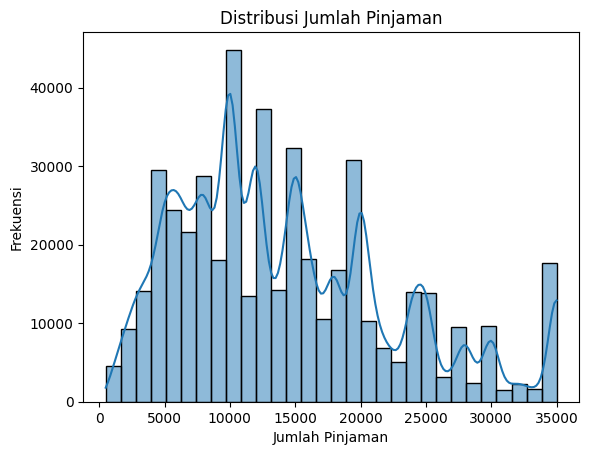

In [23]:
import seaborn as sns
import matplotlib.pyplot as plt

# Misalkan 'df' adalah DataFrame yang memuat dataset Anda
sns.histplot(data_df['loan_amnt'], bins=30, kde=True)
plt.title('Distribusi Jumlah Pinjaman')
plt.xlabel('Jumlah Pinjaman')
plt.ylabel('Frekuensi')
plt.show()


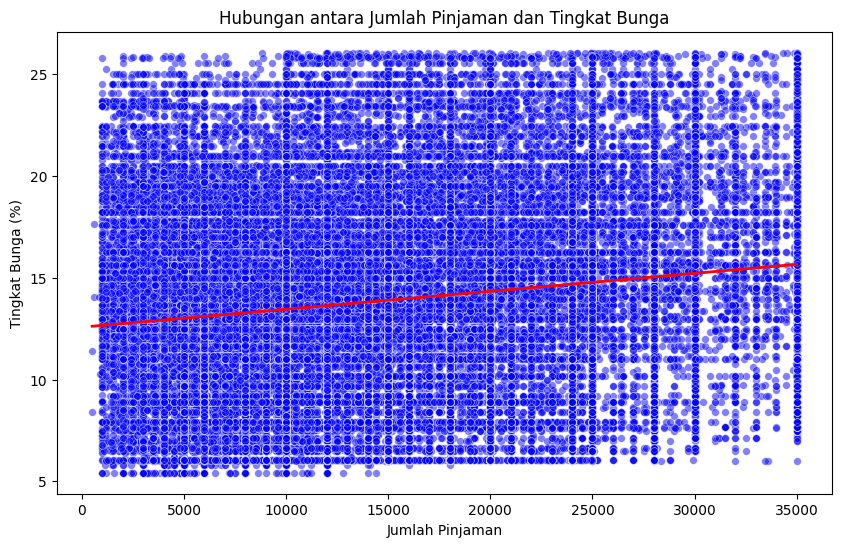

In [24]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

# Sampling data untuk mengurangi kepadatan (contoh: ambil 20% dari total data)
data_df_sampled = data_df.sample(frac=0.2, random_state=42)

# Membuat scatter plot dengan pengaturan yang lebih mudah dibaca
plt.figure(figsize=(10, 6))
sns.scatterplot(x='loan_amnt',
                y='int_rate',
                data=data_df_sampled,
                alpha=0.5,           # Transparansi untuk mengurangi overlap
                s=30,                # Ukuran marker lebih kecil
                color='blue')         # Warna yang kontras dan mudah dibaca

# Menambah garis tren untuk menunjukkan pola umum
sns.regplot(x='loan_amnt',
            y='int_rate',
            data=data_df_sampled,
            scatter=False,
            color='red',
            line_kws={'linewidth': 2})

# Menambah judul dan label
plt.title('Hubungan antara Jumlah Pinjaman dan Tingkat Bunga')
plt.xlabel('Jumlah Pinjaman')
plt.ylabel('Tingkat Bunga (%)')

# Menampilkan plot
plt.show()


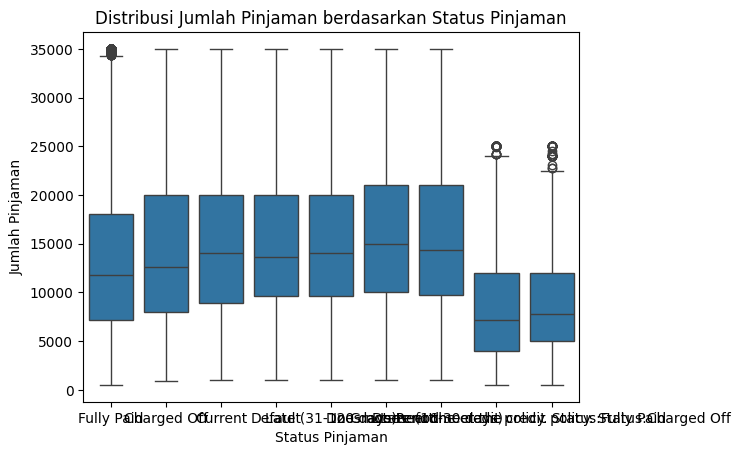

In [25]:
sns.boxplot(x='loan_status', y='loan_amnt', data=data_df)
plt.title('Distribusi Jumlah Pinjaman berdasarkan Status Pinjaman')
plt.xlabel('Status Pinjaman')
plt.ylabel('Jumlah Pinjaman')
plt.show()

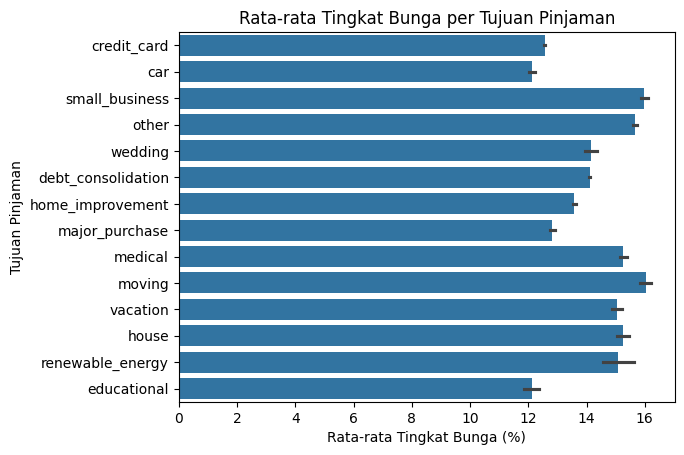

In [26]:
sns.barplot(x='int_rate', y='purpose', data=data_df, estimator=np.mean)
plt.title('Rata-rata Tingkat Bunga per Tujuan Pinjaman')
plt.xlabel('Rata-rata Tingkat Bunga (%)')
plt.ylabel('Tujuan Pinjaman')
plt.show()

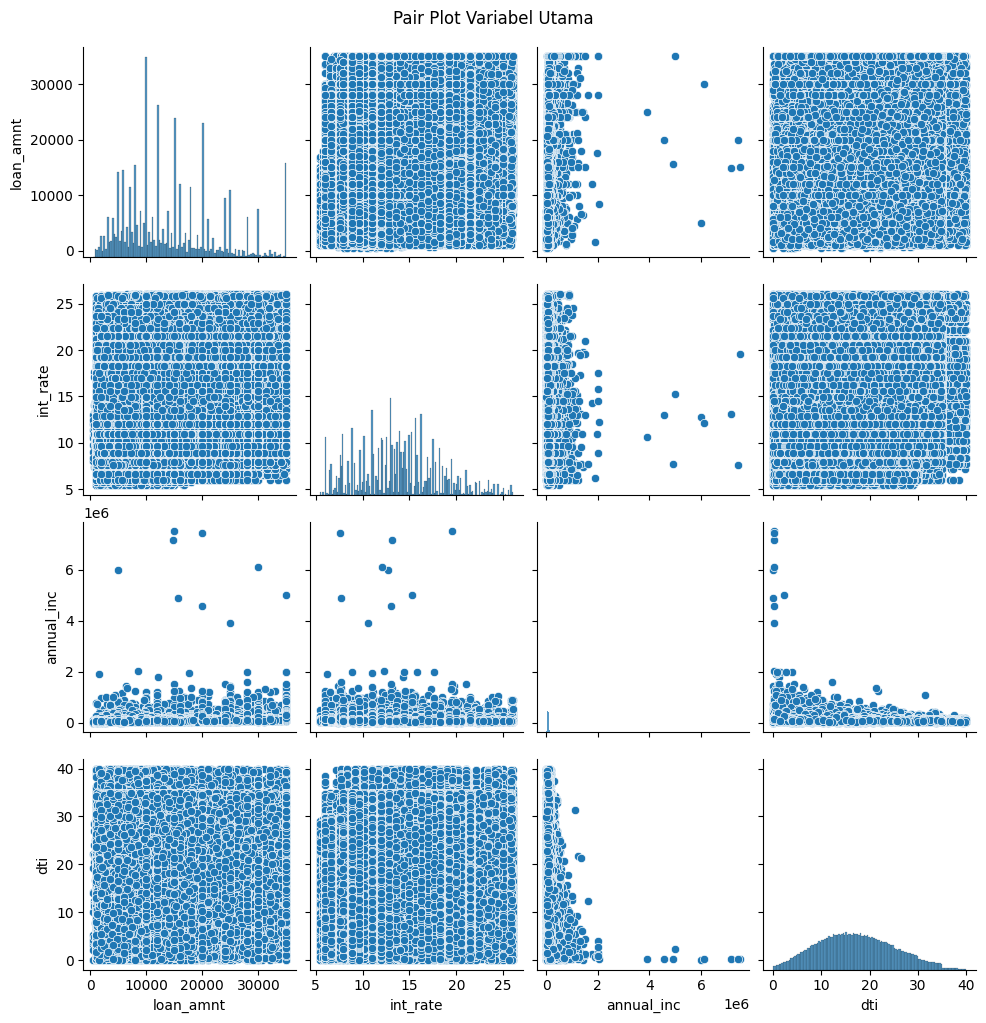

In [27]:
sns.pairplot(data_df[['loan_amnt', 'int_rate', 'annual_inc', 'dti']])
plt.suptitle('Pair Plot Variabel Utama', y=1.02)
plt.show()


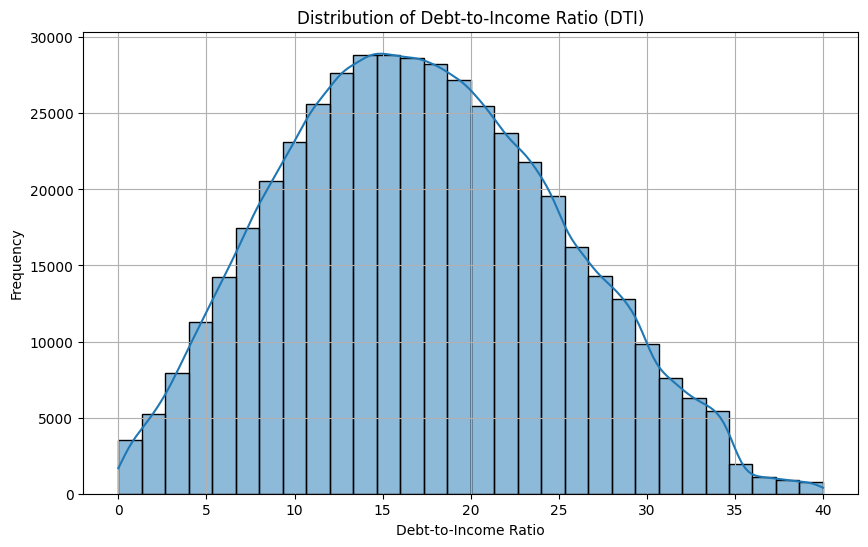

In [28]:
plt.figure(figsize=(10, 6))
sns.histplot(data_df['dti'], bins=30, kde=True)
plt.title('Distribution of Debt-to-Income Ratio (DTI)')
plt.xlabel('Debt-to-Income Ratio')
plt.ylabel('Frequency')
plt.grid()
plt.show()

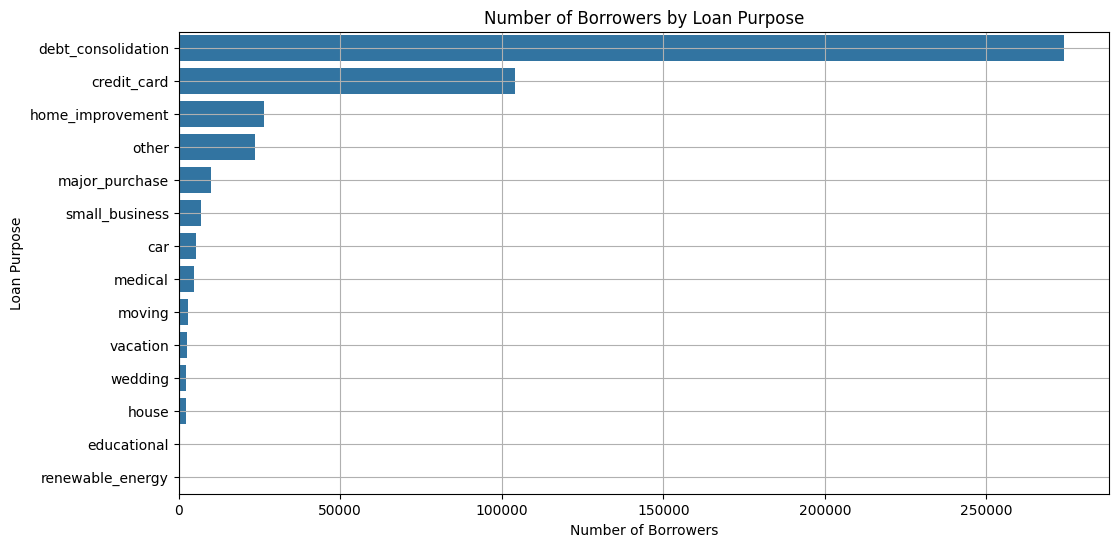

In [29]:
plt.figure(figsize=(12, 6))
sns.countplot(y='purpose', data=data_df, order=data_df['purpose'].value_counts().index)
plt.title('Number of Borrowers by Loan Purpose')
plt.xlabel('Number of Borrowers')
plt.ylabel('Loan Purpose')
plt.grid()
plt.show()

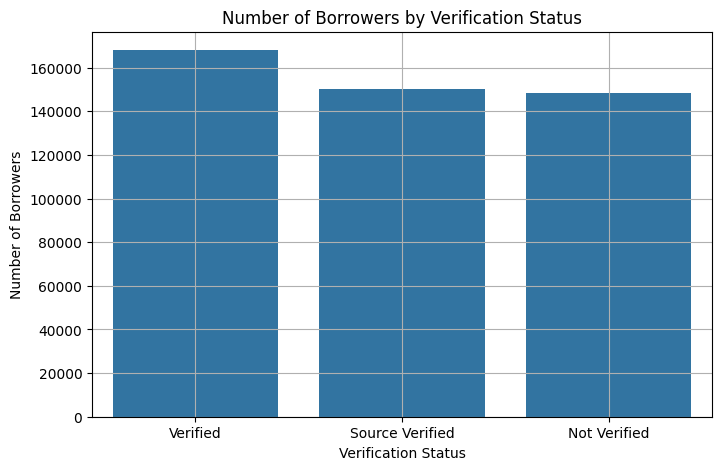

In [30]:
plt.figure(figsize=(8, 5))
sns.countplot(x='verification_status', data=data_df)
plt.title('Number of Borrowers by Verification Status')
plt.xlabel('Verification Status')
plt.ylabel('Number of Borrowers')
plt.grid()
plt.show()

Data Preparation

In [31]:
data_df = data_df.dropna(axis=1, how='all')

In [32]:
data_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 466285 entries, 0 to 466284
Data columns (total 58 columns):
 #   Column                       Non-Null Count   Dtype  
---  ------                       --------------   -----  
 0   Unnamed: 0                   466285 non-null  int64  
 1   id                           466285 non-null  int64  
 2   member_id                    466285 non-null  int64  
 3   loan_amnt                    466285 non-null  int64  
 4   funded_amnt                  466285 non-null  int64  
 5   funded_amnt_inv              466285 non-null  float64
 6   term                         466285 non-null  object 
 7   int_rate                     466285 non-null  float64
 8   installment                  466285 non-null  float64
 9   grade                        466285 non-null  object 
 10  sub_grade                    466285 non-null  object 
 11  emp_title                    438697 non-null  object 
 12  emp_length                   445277 non-null  object 
 13 

In [33]:
data_df.drop(['application_type'], axis=1, inplace=True)
data_df.drop(['zip_code'], axis=1, inplace=True)
data_df.drop(['desc'], axis=1, inplace=True)
data_df.drop(['title'], axis=1, inplace=True)
data_df.drop(['pymnt_plan'], axis=1, inplace=True)
data_df.drop(['member_id'], axis=1, inplace=True)
data_df.drop(['id'], axis=1, inplace=True)
data_df.drop(['Unnamed: 0'], axis=1, inplace=True)
data_df.drop(['url'], axis=1, inplace=True)

In [34]:
data_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 466285 entries, 0 to 466284
Data columns (total 49 columns):
 #   Column                       Non-Null Count   Dtype  
---  ------                       --------------   -----  
 0   loan_amnt                    466285 non-null  int64  
 1   funded_amnt                  466285 non-null  int64  
 2   funded_amnt_inv              466285 non-null  float64
 3   term                         466285 non-null  object 
 4   int_rate                     466285 non-null  float64
 5   installment                  466285 non-null  float64
 6   grade                        466285 non-null  object 
 7   sub_grade                    466285 non-null  object 
 8   emp_title                    438697 non-null  object 
 9   emp_length                   445277 non-null  object 
 10  home_ownership               466285 non-null  object 
 11  annual_inc                   466281 non-null  float64
 12  verification_status          466285 non-null  object 
 13 

FEATURE ENGINEERING

In [35]:
data_df['issue_d'].dtypes
data_df['last_pymnt_d'].dtypes
data_df['next_pymnt_d'].dtypes
data_df['last_credit_pull_d'].dtypes
data_df['earliest_cr_line'].dtypes

dtype('O')

In [36]:
# Mengonversi ke datetime

data_df['issue_d'] = pd.to_datetime(data_df['issue_d'], errors='coerce', format='%b-%y')
data_df['last_pymnt_d'] = pd.to_datetime(data_df['last_pymnt_d'], errors='coerce', format='%b-%y')
data_df['next_pymnt_d'] = pd.to_datetime(data_df['next_pymnt_d'], errors='coerce', format='%b-%y')
data_df['last_credit_pull_d'] = pd.to_datetime(data_df['last_credit_pull_d'], errors='coerce', format='%b-%y')
data_df['earliest_cr_line'] = pd.to_datetime(data_df['earliest_cr_line'], errors='coerce', format='%b-%y')


In [37]:
# Mengekstrak bulan dan tahun

data_df['issue_d_month'] = data_df['issue_d'].dt.month
data_df['last_pymnt_d_month'] = data_df['last_pymnt_d'].dt.month
data_df['next_pymnt_d_month'] = data_df['next_pymnt_d'].dt.month
data_df['last_credit_pull_d_month'] = data_df['last_credit_pull_d'].dt.month
data_df['earliest_cr_line_month'] = data_df['earliest_cr_line'].dt.month


In [38]:
# Daftar kolom yang ingin ditampilkan
columns_to_display = ['issue_d_month', 'last_pymnt_d_month', 'next_pymnt_d_month', 'last_credit_pull_d_month', 'earliest_cr_line_month']

In [39]:
# Menampilkan hanya kolom yang ditentukan
selected_data = data_df[columns_to_display]

# Tampilkan hasil
print(selected_data)

        issue_d_month  last_pymnt_d_month  next_pymnt_d_month  \
0                  12                 1.0                 NaN   
1                  12                 4.0                 NaN   
2                  12                 6.0                 NaN   
3                  12                 1.0                 NaN   
4                  12                 1.0                 2.0   
...               ...                 ...                 ...   
466280              1                 1.0                 2.0   
466281              1                12.0                 NaN   
466282              1                 1.0                 2.0   
466283              1                12.0                 NaN   
466284              1                 1.0                 2.0   

        last_credit_pull_d_month  earliest_cr_line_month  
0                            1.0                     1.0  
1                            9.0                     4.0  
2                            1.0          

In [40]:
data_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 466285 entries, 0 to 466284
Data columns (total 54 columns):
 #   Column                       Non-Null Count   Dtype         
---  ------                       --------------   -----         
 0   loan_amnt                    466285 non-null  int64         
 1   funded_amnt                  466285 non-null  int64         
 2   funded_amnt_inv              466285 non-null  float64       
 3   term                         466285 non-null  object        
 4   int_rate                     466285 non-null  float64       
 5   installment                  466285 non-null  float64       
 6   grade                        466285 non-null  object        
 7   sub_grade                    466285 non-null  object        
 8   emp_title                    438697 non-null  object        
 9   emp_length                   445277 non-null  object        
 10  home_ownership               466285 non-null  object        
 11  annual_inc                

Labelling Variable Target

In [41]:
data_df['loan_status'].value_counts()

,count
loan_status,
Current,224226
Fully Paid,184739
Charged Off,42475
Late (31-120 days),6900
In Grace Period,3146
Does not meet the credit policy. Status:Fully Paid,1988
Late (16-30 days),1218
Default,832
Does not meet the credit policy. Status:Charged Off,761


In [42]:
import pandas as pd
from sklearn.preprocessing import LabelEncoder
# Membuat DataFrame contoh
data = {
    'loan_status': [
        'Current',
        'Fully Paid',
        'Charged Off',
        'Late (31-120 days)',
        'In Grace Period',
        'Does not meet the credit policy. Status:Fully Paid',
        'Late (16-30 days)',
        'Default',
        'Does not meet the credit policy. Status:Charged Off'
    ],
    'count': [224226, 184739, 42475, 6900, 3146, 1988, 1218, 832, 761]
}

df = pd.DataFrame(data)

In [43]:
df

,loan_status,count
0,Current,224226
1,Fully Paid,184739
2,Charged Off,42475
3,Late (31-120 days),6900
4,In Grace Period,3146
5,Does not meet the credit policy. Status:Fully ...,1988
6,Late (16-30 days),1218
7,Default,832
8,Does not meet the credit policy. Status:Charge...,761


In [44]:
data_df['loan_status'].tail()

,loan_status
466280,Current
466281,Charged Off
466282,Current
466283,Fully Paid
466284,Current


In [45]:
# Mendefinisikan mapping untuk mengganti status

# label_encoder = LabelEncoder() # This line is no longer needed
status_mapping = {
    'Current': 'good',
    'Fully Paid': 'good',
    'Charged Off': 'bad',
    'Late (31-120 days)': 'bad',
    'In Grace Period': 'bad',
    'Does not meet the credit policy. Status:Fully Paid': 'good',
    'Late (16-30 days)': 'bad',
    'Default': 'bad',
    'Does not meet the credit policy. Status:Charged Off': 'bad'
}

# Mengganti status pinjaman di data_df, bukan di df
data_df['loan_status'] = data_df['loan_status'].map(status_mapping)

# Tampilkan hasil
print(data_df['loan_status'])

0         good
1          bad
2         good
3         good
4         good
          ... 
466280    good
466281     bad
466282    good
466283    good
466284    good
Name: loan_status, Length: 466285, dtype: object


In [46]:
data_df['loan_status'].head()

,loan_status
0,good
1,bad
2,good
3,good
4,good


In [47]:
data_df

,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,emp_title,emp_length,...,policy_code,acc_now_delinq,tot_coll_amt,tot_cur_bal,total_rev_hi_lim,issue_d_month,last_pymnt_d_month,next_pymnt_d_month,last_credit_pull_d_month,earliest_cr_line_month
0,5000,5000,4975.0,36 months,10.65,162.87,B,B2,NaN,10+ years,...,1,0.0,NaN,NaN,NaN,12,1.0,NaN,1.0,1.0
1,2500,2500,2500.0,60 months,15.27,59.83,C,C4,Ryder,< 1 year,...,1,0.0,NaN,NaN,NaN,12,4.0,NaN,9.0,4.0
2,2400,2400,2400.0,36 months,15.96,84.33,C,C5,NaN,10+ years,...,1,0.0,NaN,NaN,NaN,12,6.0,NaN,1.0,11.0
3,10000,10000,10000.0,36 months,13.49,339.31,C,C1,AIR RESOURCES BOARD,10+ years,...,1,0.0,NaN,NaN,NaN,12,1.0,NaN,1.0,2.0
4,3000,3000,3000.0,60 months,12.69,67.79,B,B5,University Medical Group,1 year,...,1,0.0,NaN,NaN,NaN,12,1.0,2.0,1.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
466280,18400,18400,18400.0,60 months,14.47,432.64,C,C2,Financial Advisor,4 years,...,1,0.0,0.0,294998.0,29900.0,1,1.0,2.0,1.0,4.0
466281,22000,22000,22000.0,60 months,19.97,582.50,D,D5,Chief of Interpretation (Park Ranger),10+ years,...,1,0.0,0.0,221830.0,39400.0,1,12.0,NaN,1.0,6.0
466282,20700,20700,20700.0,60 months,16.99,514.34,D,D1,patrol,7 years,...,1,0.0,0.0,73598.0,13100.0,1,1.0,2.0,12.0,12.0
466283,2000,2000,2000.0,36 months,7.90,62.59,A,A4,Server Engineer Lead,3 years,...,1,0.0,0.0,591610.0,53100.0,1,12.0,NaN,4.0,2.0


Feature Engineering

ordinal encoder

In [48]:
data_df['term'].value_counts()

,count
term,
36 months,337953
60 months,128332


In [49]:
data_df['grade'].value_counts()


,count
grade,
B,136929
C,125293
D,76888
A,74867
E,35757
F,13229
G,3322


In [50]:
data_df['sub_grade'].value_counts()


,count
sub_grade,
B3,31686
B4,30505
C1,26953
C2,26740
B2,26610
C3,25317
B5,25252
C4,24105
B1,22876


In [51]:
data_df['emp_length'].value_counts()


,count
emp_length,
10+ years,150049
2 years,41373
3 years,36596
< 1 year,36265
5 years,30774
1 year,29622
4 years,28023
7 years,26180
6 years,26112


In [52]:
data_df['verification_status'].value_counts()

,count
verification_status,
Verified,168055
Source Verified,149993
Not Verified,148237


In [53]:
import pandas as pd
from sklearn.preprocessing import OrdinalEncoder

In [54]:
# Membuat DataFrame contoh
data = {
    'term': ['36 months', '60 months', '36 months', '60 months', '36 months',
             '60 months', '36 months', '60 months', '36 months', '60 months',
             '36 months', '60 months', '36 months', '60 months', '36 months',
             '60 months', '36 months', '60 months', '36 months', '60 months',
             '36 months', '60 months', '36 months', '60 months', '36 months',
             '60 months', '36 months', '60 months', '36 months', '60 months',
             '36 months', '60 months', '36 months', '60 months', '36 months'],
    'grade': ['B', 'C', 'D', 'A', 'E', 'F', 'G', 'B', 'C', 'D',
              'A', 'E', 'F', 'G', 'B', 'C', 'D', 'A', 'E', 'F',
              'G', 'B', 'C', 'D', 'A', 'E', 'F', 'G', 'B', 'C',
              'D', 'A', 'E', 'F', 'G'],
    'sub_grade': ['B3', 'B4', 'C1', 'C2', 'B2', 'C3', 'B5', 'B3', 'B4', 'C1',
                  'C2', 'B2', 'C3', 'B5', 'B3', 'B4', 'C1', 'C2', 'B2', 'C3',
                  'B5', 'B3', 'B4', 'C1', 'C2', 'B2', 'C3', 'B5', 'B3', 'B4',
                  'C1', 'C2', 'B2', 'C3', 'B5'],
    'emp_length': ['10+ years', '2 years', '3 years', '< 1 year', '5 years',
                   '1 year', '4 years', '10+ years', '2 years', '3 years',
                   '< 1 year', '10+ years', '2 years', '3 years', '< 1 year',
                   '5 years', '1 year', '4 years', '10+ years', '2 years',
                   '3 years', '< 1 year', '10+ years', '2 years', '3 years',
                   '< 1 year', '5 years', '1 year', '4 years', '10+ years',
                   '2 years', '3 years', '< 1 year', '5 years', '1 year'],
    'verification_status': ['Verified', 'Not Verified', 'Verified', 'Verified',
                            'Not Verified', 'Verified', 'Verified', 'Not Verified',
                            'Verified', 'Verified', 'Not Verified', 'Verified',
                            'Verified', 'Not Verified', 'Verified', 'Verified',
                            'Not Verified', 'Verified', 'Verified', 'Not Verified',
                            'Verified', 'Verified', 'Not Verified', 'Verified',
                            'Verified', 'Not Verified', 'Verified', 'Verified',
                            'Not Verified', 'Verified', 'Verified', 'Not Verified',
                            'Verified', 'Verified', 'Not Verified']
}

df = pd.DataFrame(data)

# Menampilkan DataFrame sebelum encoding
print("DataFrame Sebelum Encoding:")
print(df)

# 1. Menggunakan OrdinalEncoder
ordinal_encoder = OrdinalEncoder()
df['term_ordinal'] = ordinal_encoder.fit_transform(df[['term']])
df['grade_ordinal'] = ordinal_encoder.fit_transform(df[['grade']])
df['sub_grade_ordinal'] = ordinal_encoder.fit_transform(df[['sub_grade']])
df['emp_length_ordinal'] = ordinal_encoder.fit_transform(df[['emp_length']])
df['verification_status_ordinal'] = ordinal_encoder.fit_transform(df[['verification_status']])

print("\nSetelah Ordinal Encoding:")
print(df[['term', 'term_ordinal']])
print(df[['grade', 'grade_ordinal']])
print(df[['sub_grade', 'sub_grade_ordinal']])
print(df[['emp_length', 'emp_length_ordinal']])
print(df[['verification_status', 'verification_status_ordinal']])


DataFrame Sebelum Encoding:
         term grade sub_grade emp_length verification_status
0   36 months     B        B3  10+ years            Verified
1   60 months     C        B4    2 years        Not Verified
2   36 months     D        C1    3 years            Verified
3   60 months     A        C2   < 1 year            Verified
4   36 months     E        B2    5 years        Not Verified
5   60 months     F        C3     1 year            Verified
6   36 months     G        B5    4 years            Verified
7   60 months     B        B3  10+ years        Not Verified
8   36 months     C        B4    2 years            Verified
9   60 months     D        C1    3 years            Verified
10  36 months     A        C2   < 1 year        Not Verified
11  60 months     E        B2  10+ years            Verified
12  36 months     F        C3    2 years            Verified
13  60 months     G        B5    3 years        Not Verified
14  36 months     B        B3   < 1 year            Verif

In [55]:
# Assuming ordinal_encoder is already fitted as in your previous cells
# and data_df is your original DataFrame

data_df['term_ordinal'] = ordinal_encoder.fit_transform(data_df[['term']])
data_df['grade_ordinal'] = ordinal_encoder.fit_transform(data_df[['grade']])
data_df['sub_grade_ordinal'] = ordinal_encoder.fit_transform(data_df[['sub_grade']])
data_df['emp_length_ordinal'] = ordinal_encoder.fit_transform(data_df[['emp_length']])
data_df['verification_status_ordinal'] = ordinal_encoder.fit_transform(data_df[['verification_status']])

# Now you have new columns with ordinal encodings in your original DataFrame

In [56]:
data_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 466285 entries, 0 to 466284
Data columns (total 59 columns):
 #   Column                       Non-Null Count   Dtype         
---  ------                       --------------   -----         
 0   loan_amnt                    466285 non-null  int64         
 1   funded_amnt                  466285 non-null  int64         
 2   funded_amnt_inv              466285 non-null  float64       
 3   term                         466285 non-null  object        
 4   int_rate                     466285 non-null  float64       
 5   installment                  466285 non-null  float64       
 6   grade                        466285 non-null  object        
 7   sub_grade                    466285 non-null  object        
 8   emp_title                    438697 non-null  object        
 9   emp_length                   445277 non-null  object        
 10  home_ownership               466285 non-null  object        
 11  annual_inc                

In [57]:
data_df.drop(['term'], axis=1, inplace=True)
data_df.drop(['grade'], axis=1, inplace=True)
data_df.drop(['sub_grade'], axis=1, inplace=True)
data_df.drop(['emp_length'], axis=1, inplace=True)
data_df.drop(['verification_status'], axis=1, inplace=True)

In [58]:
data_df['home_ownership'].value_counts()

,count
home_ownership,
MORTGAGE,235875
RENT,188473
OWN,41704
OTHER,182
NONE,50
ANY,1


In [59]:
data_df['purpose'].value_counts()


,count
purpose,
debt_consolidation,274195
credit_card,104157
home_improvement,26537
other,23690
major_purchase,9828
small_business,7013
car,5397
medical,4602
moving,2994


In [60]:
data_df['addr_state'].value_counts()


,count
addr_state,
CA,71450
NY,40242
TX,36439
FL,31637
IL,18612
NJ,18061
PA,16424
OH,15237
GA,14975


In [61]:
import pandas as pd
from sklearn.preprocessing import LabelEncoder

In [62]:
# Membuat DataFrame contoh
data = {
    'home_ownership': ['MORTGAGE', 'RENT', 'OWN', 'OTHER', 'NONE', 'ANY'],
    'purpose': ['debt_consolidation', 'credit_card', 'home_improvement',
                'other', 'major_purchase', 'small_business', 'car', 'medical',
                'moving', 'vacation', 'wedding', 'house', 'educational',  'renewable_energy'],
    'addr_state': ['CA', 'NY', 'TX', 'FL', 'IL', 'NJ', 'PA', 'OH', 'GA', 'VA',
                  'NC', 'MI', 'MA', 'MD', 'AZ', 'WA', 'CO', 'MN', 'MO', 'CT',
                  'IN', 'NV', 'TN', 'OR', 'WI', 'AL', 'SC', 'LA', 'KY', 'KS',
                  'OK', 'AR', 'UT', 'NM', 'HI', 'WV', 'NH', 'RI', 'DC', 'MT',
                  'DE', 'AK', 'MS', 'WY', 'SD', 'VT', 'IA', 'NE', 'ID', 'ME'],
    'initial_list_status': ['f', 'w'],

}

# Find the maximum length among all lists
max_len = max(len(value) for value in data.values())

# Pad shorter lists with None to match the maximum length
padded_data = {
    key: value + [None] * (max_len - len(value))
    for key, value in data.items()
}

df = pd.DataFrame(padded_data)
# Menampilkan DataFrame sebelum encoding
print("DataFrame Sebelum Encoding:")
print(df)

# Menggunakan LabelEncoder untuk kolom 'home_ownership'
label_encoder_home_ownership = LabelEncoder()
df['home_ownership_label'] = label_encoder_home_ownership.fit_transform(df['home_ownership'])

# Menggunakan LabelEncoder untuk kolom 'purpose'
label_encoder_purpose = LabelEncoder()
df['purpose_label'] = label_encoder_purpose.fit_transform(df['purpose'])

# Menggunakan LabelEncoder untuk kolom 'addr_state'
label_encoder_addr_state = LabelEncoder()
df['addr_state_label'] = label_encoder_addr_state.fit_transform(df['addr_state'])

# Menggunakan LabelEncoder untuk kolom 'initial_list_status'
label_encoder_initial_list_status = LabelEncoder()
df['initial_list_status_label'] = label_encoder_initial_list_status.fit_transform(df['initial_list_status'])
# # 1. Menggunakan LabelEncoder
# label_encoder = LabelEncoder()
# df['home_ownership_label'] = label_encoder.fit_transform(df[['home_ownership']])
# df['purpose_label'] = label_encoder.fit_transform(df[['purpose']])
# df['addr_state_label'] = label_encoder.fit_transform(df[['addr_state']])
# df['initial_list_status_label'] = label_encoder.fit_transform(df[['initial_list_status']])





DataFrame Sebelum Encoding:
   home_ownership             purpose addr_state initial_list_status
0        MORTGAGE  debt_consolidation         CA                   f
1            RENT         credit_card         NY                   w
2             OWN    home_improvement         TX                None
3           OTHER               other         FL                None
4            NONE      major_purchase         IL                None
5             ANY      small_business         NJ                None
6            None                 car         PA                None
7            None             medical         OH                None
8            None              moving         GA                None
9            None            vacation         VA                None
10           None             wedding         NC                None
11           None               house         MI                None
12           None         educational         MA                None
13    

In [63]:
print("\nSetelah Label Encoder:")
print(df['home_ownership_label'])
print(df['purpose_label'])
print(df['addr_state_label'])
print(df['initial_list_status_label'])


Setelah Label Encoder:
0     1
1     5
2     4
3     3
4     2
5     0
6     6
7     6
8     6
9     6
10    6
11    6
12    6
13    6
14    6
15    6
16    6
17    6
18    6
19    6
20    6
21    6
22    6
23    6
24    6
25    6
26    6
27    6
28    6
29    6
30    6
31    6
32    6
33    6
34    6
35    6
36    6
37    6
38    6
39    6
40    6
41    6
42    6
43    6
44    6
45    6
46    6
47    6
48    6
49    6
Name: home_ownership_label, dtype: int64
0      2
1      1
2      4
3      9
4      6
5     11
6      0
7      7
8      8
9     12
10    13
11     5
12     3
13    10
14    14
15    14
16    14
17    14
18    14
19    14
20    14
21    14
22    14
23    14
24    14
25    14
26    14
27    14
28    14
29    14
30    14
31    14
32    14
33    14
34    14
35    14
36    14
37    14
38    14
39    14
40    14
41    14
42    14
43    14
44    14
45    14
46    14
47    14
48    14
49    14
Name: purpose_label, dtype: int64
0      4
1     33
2     42
3      9
4     14
5     

In [64]:
import pandas as pd
from sklearn.preprocessing import LabelEncoder

In [65]:
import pandas as pd
from sklearn.preprocessing import LabelEncoder

# Create a LabelEncoder instance
label_encoder = LabelEncoder()

data_df['home_ownership_label'] = label_encoder.fit_transform(data_df[['home_ownership']])
data_df['purpose_label'] = label_encoder.fit_transform(data_df[['purpose']])
data_df['addr_state_label'] = label_encoder.fit_transform(data_df[['addr_state']])
data_df['initial_list_status_label'] = label_encoder.fit_transform(data_df[['initial_list_status']])

In [66]:
data_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 466285 entries, 0 to 466284
Data columns (total 58 columns):
 #   Column                       Non-Null Count   Dtype         
---  ------                       --------------   -----         
 0   loan_amnt                    466285 non-null  int64         
 1   funded_amnt                  466285 non-null  int64         
 2   funded_amnt_inv              466285 non-null  float64       
 3   int_rate                     466285 non-null  float64       
 4   installment                  466285 non-null  float64       
 5   emp_title                    438697 non-null  object        
 6   home_ownership               466285 non-null  object        
 7   annual_inc                   466281 non-null  float64       
 8   issue_d                      466285 non-null  datetime64[ns]
 9   loan_status                  466285 non-null  object        
 10  purpose                      466285 non-null  object        
 11  addr_state                

In [67]:
data_df.drop(['home_ownership'], axis=1, inplace=True)
data_df.drop(['purpose'], axis=1, inplace=True)
data_df.drop(['addr_state'], axis=1, inplace=True)
data_df.drop(['initial_list_status'], axis=1, inplace=True)

In [68]:
data_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 466285 entries, 0 to 466284
Data columns (total 54 columns):
 #   Column                       Non-Null Count   Dtype         
---  ------                       --------------   -----         
 0   loan_amnt                    466285 non-null  int64         
 1   funded_amnt                  466285 non-null  int64         
 2   funded_amnt_inv              466285 non-null  float64       
 3   int_rate                     466285 non-null  float64       
 4   installment                  466285 non-null  float64       
 5   emp_title                    438697 non-null  object        
 6   annual_inc                   466281 non-null  float64       
 7   issue_d                      466285 non-null  datetime64[ns]
 8   loan_status                  466285 non-null  object        
 9   dti                          466285 non-null  float64       
 10  delinq_2yrs                  466256 non-null  float64       
 11  earliest_cr_line          

In [69]:
data_df.drop(['last_pymnt_d'], axis=1, inplace=True)
data_df.drop(['next_pymnt_d'], axis=1, inplace=True)
data_df.drop(['last_credit_pull_d'], axis=1, inplace=True)
data_df.drop(['earliest_cr_line'], axis=1, inplace=True)
data_df.drop(['issue_d'], axis=1, inplace=True)

In [70]:
# find numerical variables

numerical = [var for var in data_df.columns if data_df[var].dtype!='O']

print('There are {} numerical variables\n'.format(len(numerical)))

print('The numerical variables are :', numerical)

There are 47 numerical variables

The numerical variables are : ['loan_amnt', 'funded_amnt', 'funded_amnt_inv', 'int_rate', 'installment', 'annual_inc', 'dti', 'delinq_2yrs', 'inq_last_6mths', 'mths_since_last_delinq', 'mths_since_last_record', 'open_acc', 'pub_rec', 'revol_bal', 'revol_util', 'total_acc', 'out_prncp', 'out_prncp_inv', 'total_pymnt', 'total_pymnt_inv', 'total_rec_prncp', 'total_rec_int', 'total_rec_late_fee', 'recoveries', 'collection_recovery_fee', 'last_pymnt_amnt', 'collections_12_mths_ex_med', 'mths_since_last_major_derog', 'policy_code', 'acc_now_delinq', 'tot_coll_amt', 'tot_cur_bal', 'total_rev_hi_lim', 'issue_d_month', 'last_pymnt_d_month', 'next_pymnt_d_month', 'last_credit_pull_d_month', 'earliest_cr_line_month', 'term_ordinal', 'grade_ordinal', 'sub_grade_ordinal', 'emp_length_ordinal', 'verification_status_ordinal', 'home_ownership_label', 'purpose_label', 'addr_state_label', 'initial_list_status_label']


In [71]:
data_df[numerical].head()

,loan_amnt,funded_amnt,funded_amnt_inv,int_rate,installment,annual_inc,dti,delinq_2yrs,inq_last_6mths,mths_since_last_delinq,...,earliest_cr_line_month,term_ordinal,grade_ordinal,sub_grade_ordinal,emp_length_ordinal,verification_status_ordinal,home_ownership_label,purpose_label,addr_state_label,initial_list_status_label
0,5000,5000,4975.0,10.65,162.87,24000.0,27.65,0.0,1.0,NaN,...,1.0,0.0,1.0,6.0,1.0,2.0,5,1,3,0
1,2500,2500,2500.0,15.27,59.83,30000.0,1.00,0.0,5.0,NaN,...,4.0,1.0,2.0,13.0,10.0,1.0,5,0,10,0
2,2400,2400,2400.0,15.96,84.33,12252.0,8.72,0.0,2.0,NaN,...,11.0,0.0,2.0,14.0,1.0,0.0,5,11,14,0
3,10000,10000,10000.0,13.49,339.31,49200.0,20.00,0.0,1.0,35.0,...,2.0,0.0,2.0,10.0,1.0,1.0,5,9,4,0
4,3000,3000,3000.0,12.69,67.79,80000.0,17.94,0.0,0.0,38.0,...,1.0,1.0,1.0,9.0,0.0,1.0,5,9,36,0


In [72]:
data_df[numerical].tail()

,loan_amnt,funded_amnt,funded_amnt_inv,int_rate,installment,annual_inc,dti,delinq_2yrs,inq_last_6mths,mths_since_last_delinq,...,earliest_cr_line_month,term_ordinal,grade_ordinal,sub_grade_ordinal,emp_length_ordinal,verification_status_ordinal,home_ownership_label,purpose_label,addr_state_label,initial_list_status_label
466280,18400,18400,18400.0,14.47,432.64,110000.0,19.85,0.0,2.0,NaN,...,4.0,1.0,2.0,11.0,4.0,1.0,1,2,42,1
466281,22000,22000,22000.0,19.97,582.50,78000.0,18.45,0.0,5.0,NaN,...,6.0,1.0,3.0,19.0,1.0,2.0,1,2,41,0
466282,20700,20700,20700.0,16.99,514.34,46000.0,25.65,0.0,2.0,65.0,...,12.0,1.0,3.0,15.0,7.0,2.0,1,2,34,0
466283,2000,2000,2000.0,7.90,62.59,83000.0,5.39,3.0,1.0,13.0,...,2.0,0.0,0.0,3.0,3.0,2.0,4,1,4,1
466284,10000,10000,9975.0,19.20,367.58,46000.0,22.78,1.0,0.0,9.0,...,2.0,0.0,3.0,17.0,1.0,2.0,1,9,4,0


In [73]:
data_df[numerical].isnull().sum()

,0
loan_amnt,0
funded_amnt,0
funded_amnt_inv,0
int_rate,0
installment,0
annual_inc,4
dti,0
delinq_2yrs,29
inq_last_6mths,29
mths_since_last_delinq,250351


**Data Preparation**

In [74]:
data_df

,loan_amnt,funded_amnt,funded_amnt_inv,int_rate,installment,emp_title,annual_inc,loan_status,dti,delinq_2yrs,...,earliest_cr_line_month,term_ordinal,grade_ordinal,sub_grade_ordinal,emp_length_ordinal,verification_status_ordinal,home_ownership_label,purpose_label,addr_state_label,initial_list_status_label
0,5000,5000,4975.0,10.65,162.87,NaN,24000.0,good,27.65,0.0,...,1.0,0.0,1.0,6.0,1.0,2.0,5,1,3,0
1,2500,2500,2500.0,15.27,59.83,Ryder,30000.0,bad,1.00,0.0,...,4.0,1.0,2.0,13.0,10.0,1.0,5,0,10,0
2,2400,2400,2400.0,15.96,84.33,NaN,12252.0,good,8.72,0.0,...,11.0,0.0,2.0,14.0,1.0,0.0,5,11,14,0
3,10000,10000,10000.0,13.49,339.31,AIR RESOURCES BOARD,49200.0,good,20.00,0.0,...,2.0,0.0,2.0,10.0,1.0,1.0,5,9,4,0
4,3000,3000,3000.0,12.69,67.79,University Medical Group,80000.0,good,17.94,0.0,...,1.0,1.0,1.0,9.0,0.0,1.0,5,9,36,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
466280,18400,18400,18400.0,14.47,432.64,Financial Advisor,110000.0,good,19.85,0.0,...,4.0,1.0,2.0,11.0,4.0,1.0,1,2,42,1
466281,22000,22000,22000.0,19.97,582.50,Chief of Interpretation (Park Ranger),78000.0,bad,18.45,0.0,...,6.0,1.0,3.0,19.0,1.0,2.0,1,2,41,0
466282,20700,20700,20700.0,16.99,514.34,patrol,46000.0,good,25.65,0.0,...,12.0,1.0,3.0,15.0,7.0,2.0,1,2,34,0
466283,2000,2000,2000.0,7.90,62.59,Server Engineer Lead,83000.0,good,5.39,3.0,...,2.0,0.0,0.0,3.0,3.0,2.0,4,1,4,1


In [75]:
data_df.isnull().sum()

,0
loan_amnt,0
funded_amnt,0
funded_amnt_inv,0
int_rate,0
installment,0
emp_title,27588
annual_inc,4
loan_status,0
dti,0
delinq_2yrs,29


with impute data

In [76]:
# data_df['emp_title'].fillna(data_df['emp_title'].mean(), inplace=True)
data_df['delinq_2yrs'].fillna(data_df['delinq_2yrs'].mean(), inplace=True)
data_df['inq_last_6mths'].fillna(data_df['inq_last_6mths'].mean(), inplace=True)
data_df['mths_since_last_delinq'].fillna(data_df['mths_since_last_delinq'].mean(), inplace=True)
data_df['mths_since_last_record'].fillna(data_df['mths_since_last_record'].mean(), inplace=True)
data_df['open_acc'].fillna(data_df['open_acc'].mean(), inplace=True)
data_df['pub_rec'].fillna(data_df['pub_rec'].mean(), inplace=True)
data_df['revol_util'].fillna(data_df['revol_util'].mean(), inplace=True)
data_df['total_acc'].fillna(data_df['total_acc'].mean(), inplace=True)
data_df['collections_12_mths_ex_med'].fillna(data_df['collections_12_mths_ex_med'].mean(), inplace=True)
data_df['mths_since_last_major_derog'].fillna(data_df['mths_since_last_major_derog'].mean(), inplace=True)
data_df['acc_now_delinq'].fillna(data_df['acc_now_delinq'].mean(), inplace=True)
data_df['tot_coll_amt'].fillna(data_df['tot_coll_amt'].mean(), inplace=True)
data_df['tot_cur_bal'].fillna(data_df['tot_cur_bal'].mean(), inplace=True)
data_df['total_rev_hi_lim'].fillna(data_df['total_rev_hi_lim'].mean(), inplace=True)
data_df['last_pymnt_d_month'].fillna(data_df['last_pymnt_d_month'].mean(), inplace=True)
data_df['next_pymnt_d_month'].fillna(data_df['next_pymnt_d_month'].mean(), inplace=True)
data_df['last_credit_pull_d_month'].fillna(data_df['last_credit_pull_d_month'].mean(), inplace=True)
data_df['earliest_cr_line_month'].fillna(data_df['earliest_cr_line_month'].mean(), inplace=True)
data_df['emp_length_ordinal'].fillna(data_df['emp_length_ordinal'].mean(), inplace=True)

In [77]:
data_df['emp_title'].fillna(data_df['emp_title'].mode()[0], inplace=True)
data_df['annual_inc'].fillna(data_df['annual_inc'].mean(), inplace=True)

In [78]:
data_df.isnull().sum()

,0
loan_amnt,0
funded_amnt,0
funded_amnt_inv,0
int_rate,0
installment,0
emp_title,0
annual_inc,0
loan_status,0
dti,0
delinq_2yrs,0


In [79]:
data_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 466285 entries, 0 to 466284
Data columns (total 49 columns):
 #   Column                       Non-Null Count   Dtype  
---  ------                       --------------   -----  
 0   loan_amnt                    466285 non-null  int64  
 1   funded_amnt                  466285 non-null  int64  
 2   funded_amnt_inv              466285 non-null  float64
 3   int_rate                     466285 non-null  float64
 4   installment                  466285 non-null  float64
 5   emp_title                    466285 non-null  object 
 6   annual_inc                   466285 non-null  float64
 7   loan_status                  466285 non-null  object 
 8   dti                          466285 non-null  float64
 9   delinq_2yrs                  466285 non-null  float64
 10  inq_last_6mths               466285 non-null  float64
 11  mths_since_last_delinq       466285 non-null  float64
 12  mths_since_last_record       466285 non-null  float64
 13 

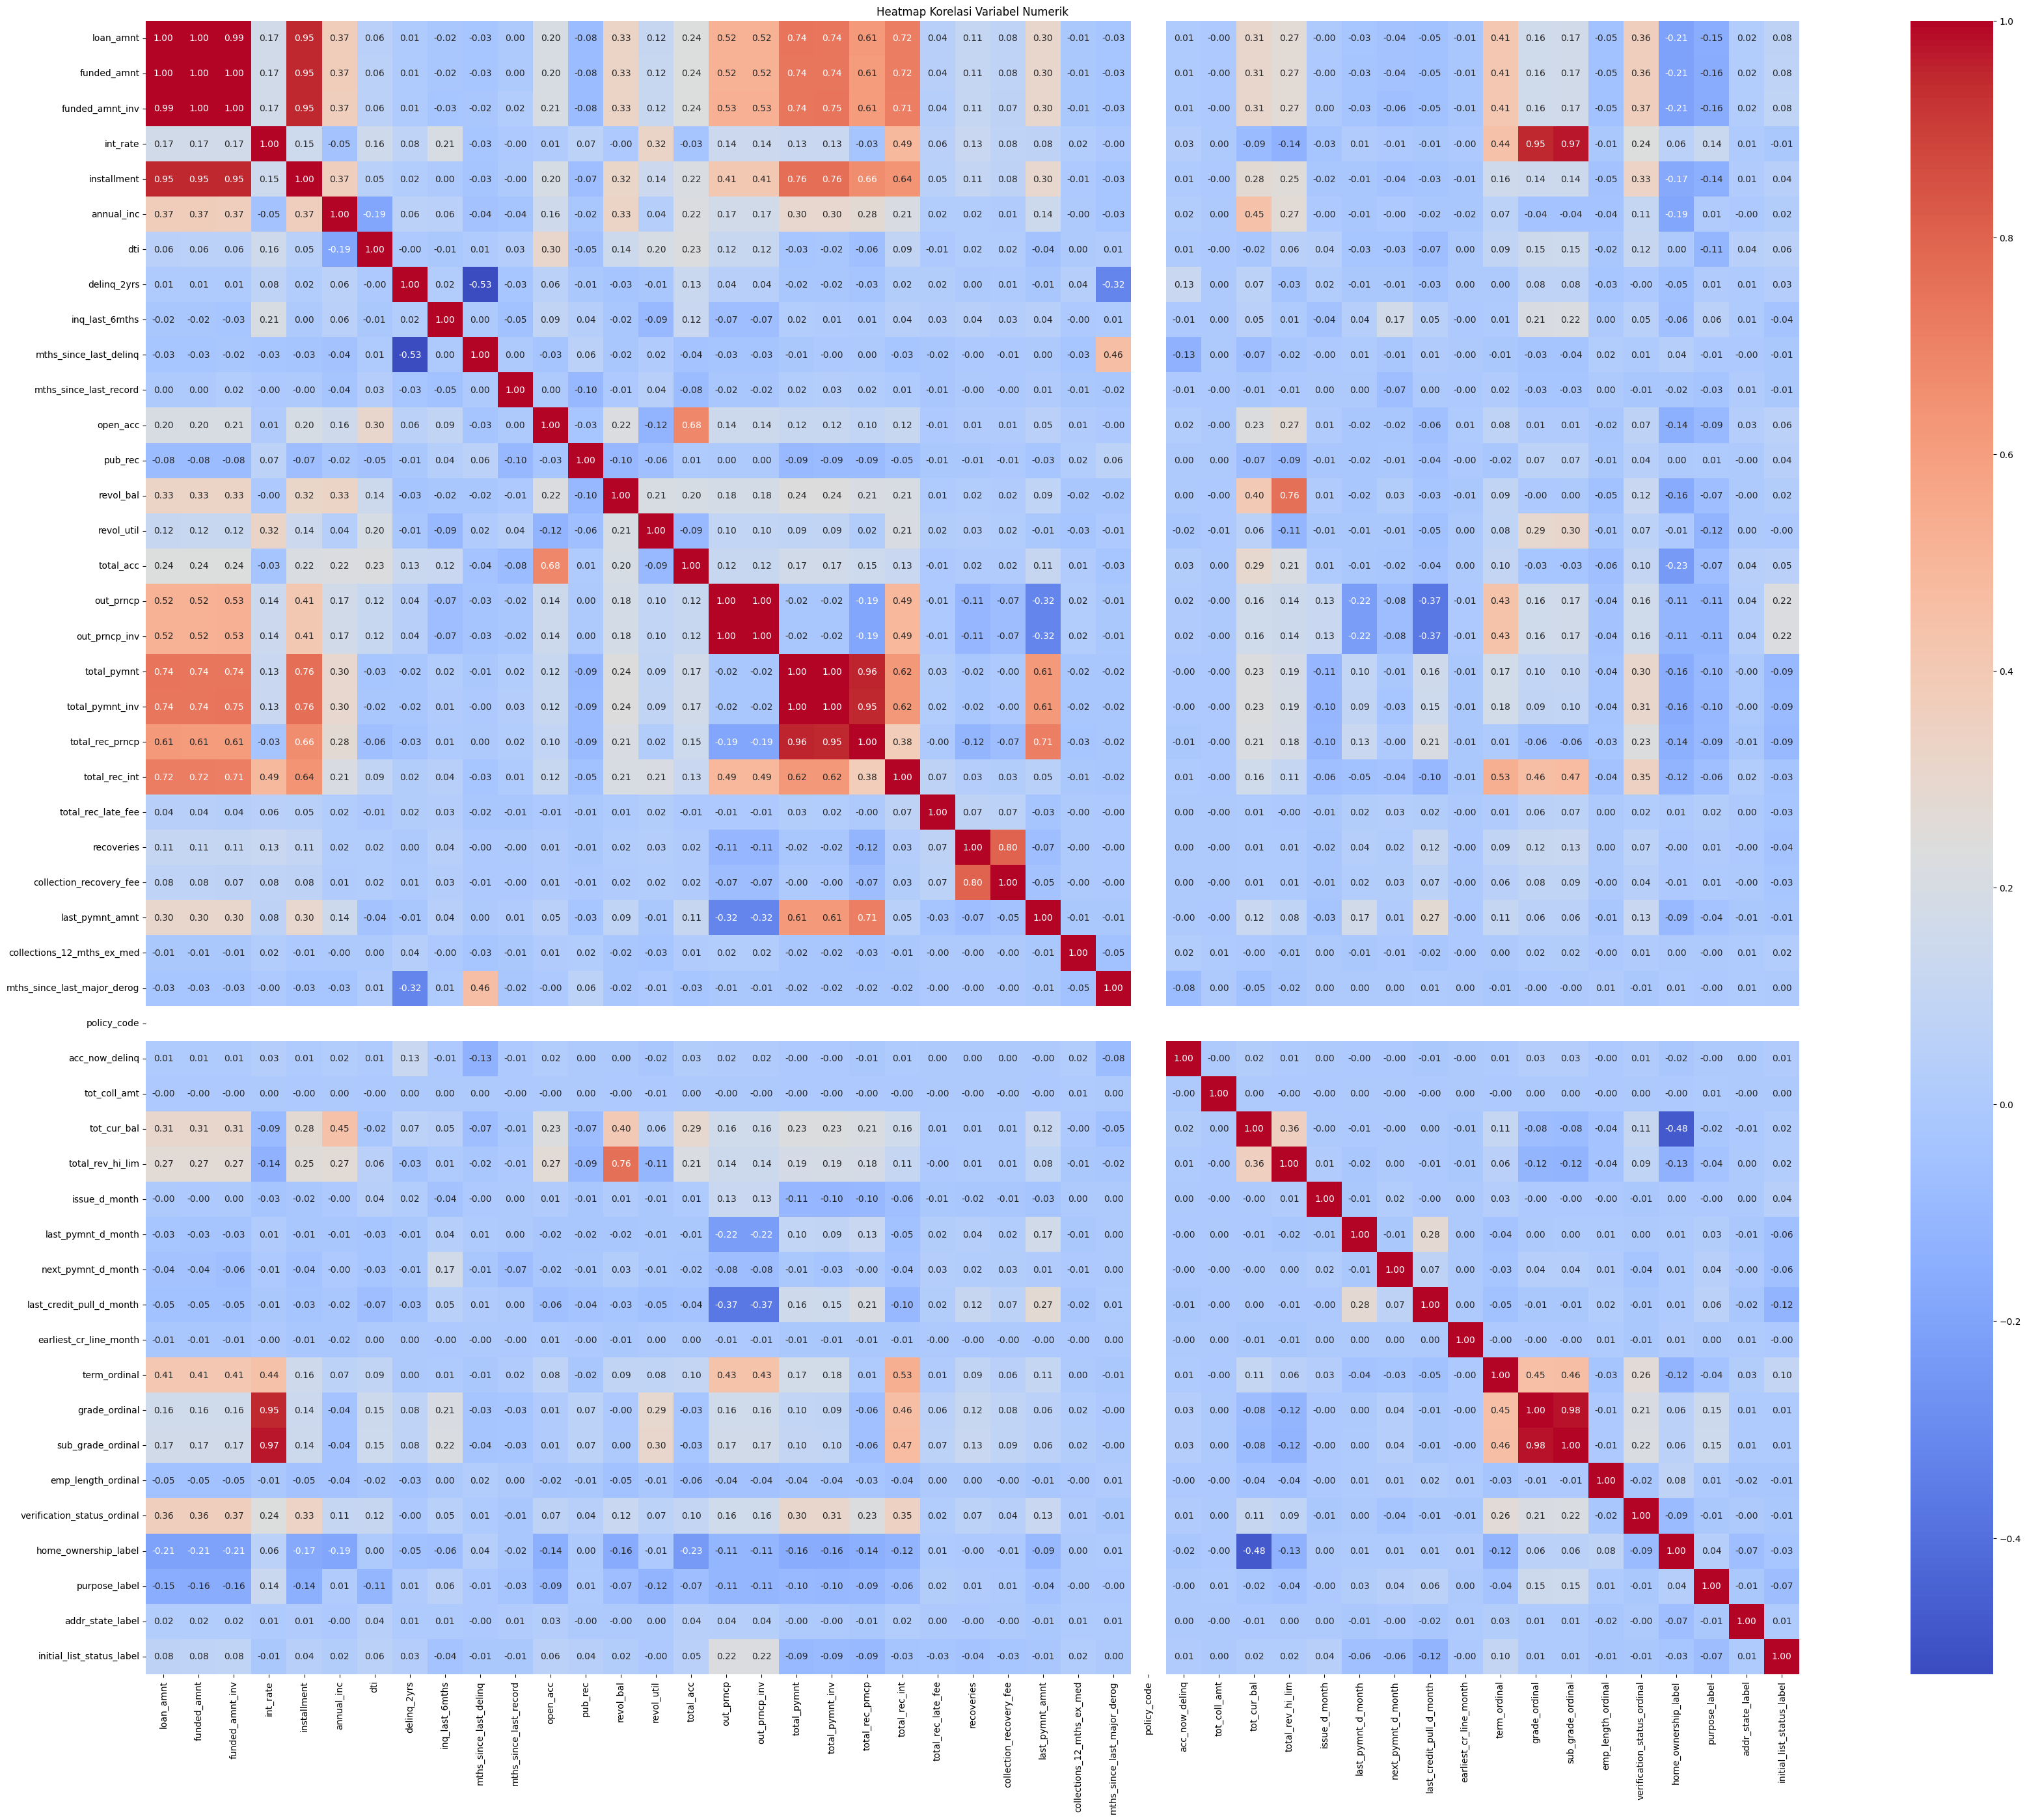

In [80]:
# Memilih hanya kolom numerik
numeric_df = data_df.select_dtypes(include=['number'])

# Menghitung matriks korelasi
correlation_matrix = numeric_df.corr()

# Menampilkan heatmap
plt.figure(figsize=(44, 33))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f', square=True)
plt.title('Heatmap Korelasi Variabel Numerik')
plt.show()

In [81]:
# view summary statistics in numerical variables

print(round(data_df.describe()),4)

       loan_amnt  funded_amnt  funded_amnt_inv  int_rate  installment  \
count   466285.0     466285.0         466285.0  466285.0     466285.0   
mean     14317.0      14292.0          14222.0      14.0        432.0   
std       8287.0       8274.0           8298.0       4.0        243.0   
min        500.0        500.0              0.0       5.0         16.0   
25%       8000.0       8000.0           8000.0      11.0        257.0   
50%      12000.0      12000.0          12000.0      14.0        380.0   
75%      20000.0      20000.0          19950.0      16.0        567.0   
max      35000.0      35000.0          35000.0      26.0       1410.0   

       annual_inc       dti  delinq_2yrs  inq_last_6mths  \
count    466285.0  466285.0     466285.0        466285.0   
mean      73277.0      17.0          0.0             1.0   
std       54963.0       8.0          1.0             1.0   
min        1896.0       0.0          0.0             0.0   
25%       45000.0      11.0          0.0  

Text(0, 0.5, 'annual_inc')

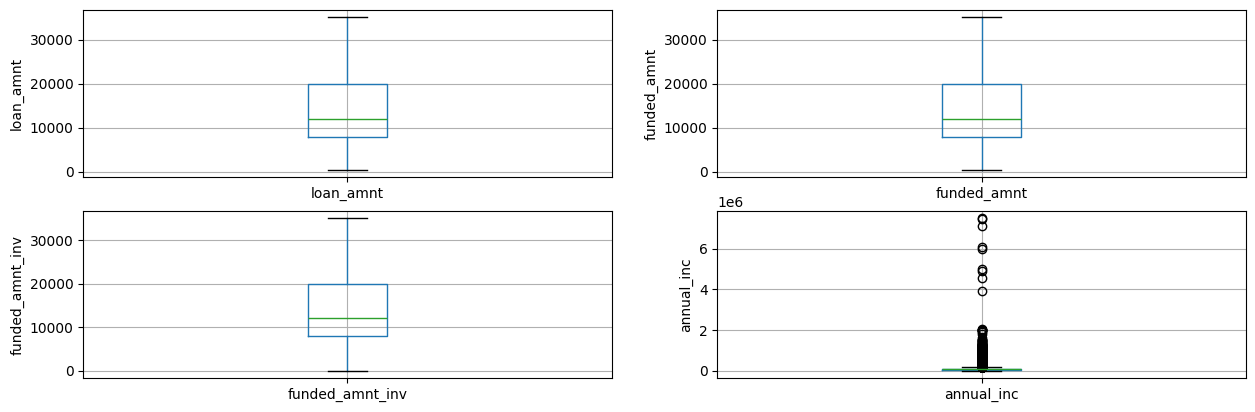

In [82]:
# draw boxplots to visualize outliers

plt.figure(figsize=(15,10))


plt.subplot(4, 2, 1)
fig = data_df.boxplot(column='loan_amnt')
fig.set_title('')
fig.set_ylabel('loan_amnt')


plt.subplot(4, 2, 2)
fig = data_df.boxplot(column='funded_amnt')
fig.set_title('')
fig.set_ylabel('funded_amnt')


plt.subplot(4, 2, 3)
fig = data_df.boxplot(column='funded_amnt_inv')
fig.set_title('')
fig.set_ylabel('funded_amnt_inv')


plt.subplot(4, 2, 4)
fig = data_df.boxplot(column='annual_inc')
fig.set_title('')
fig.set_ylabel('annual_inc')



Text(0, 0.5, 'loan_status')

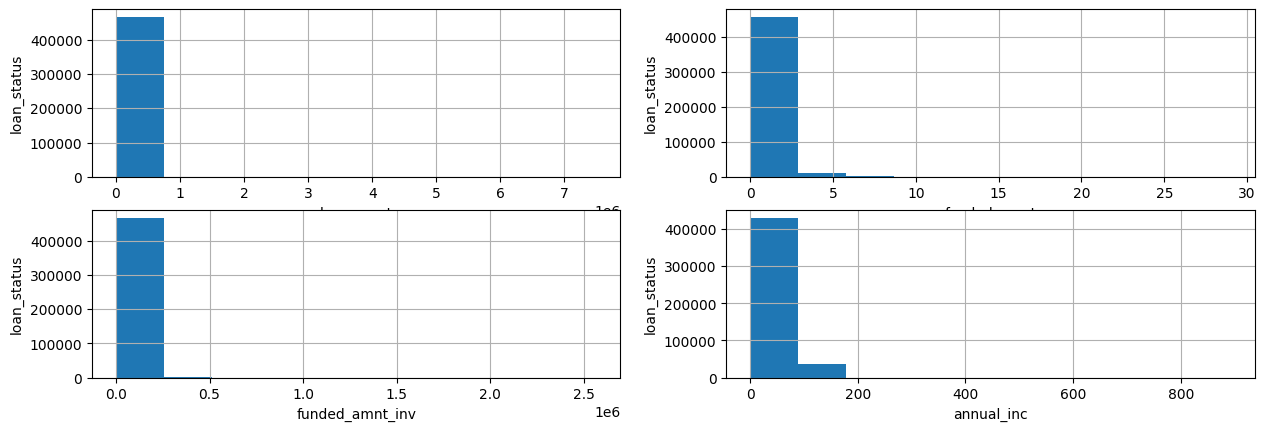

In [83]:
# plot histogram to check distribution

plt.figure(figsize=(15,10))


plt.subplot(4, 2, 1)
fig = data_df.annual_inc.hist(bins=10)
fig.set_xlabel('loan_amnt')
fig.set_ylabel('loan_status')


plt.subplot(4, 2, 2)
fig = data_df.delinq_2yrs.hist(bins=10)
fig.set_xlabel('funded_amnt')
fig.set_ylabel('loan_status')


plt.subplot(4, 2, 3)
fig = data_df.revol_bal.hist(bins=10)
fig.set_xlabel('funded_amnt_inv')
fig.set_ylabel('loan_status')


plt.subplot(4, 2, 4)
fig = data_df.revol_util.hist(bins=10)
fig.set_xlabel('annual_inc')
fig.set_ylabel('loan_status')

In [84]:
# find outliers for loan_amnt variable

IQR = data_df.loan_amnt.quantile(0.75) - data_df.loan_amnt.quantile(0.25)
Lower_fence = data_df.loan_amnt.quantile(0.25) - (IQR * 3)
Upper_fence = data_df.loan_amnt.quantile(0.75) + (IQR * 3)
print('loan_amnt outliers are values < {lowerboundary} or > {upperboundary}'.format(lowerboundary=Lower_fence, upperboundary=Upper_fence))

loan_amnt outliers are values < -28000.0 or > 56000.0


In [85]:
# find outliers for funded_amnt variable

IQR = data_df.funded_amnt.quantile(0.75) - data_df.funded_amnt.quantile(0.25)
Lower_fence = data_df.funded_amnt.quantile(0.25) - (IQR * 3)
Upper_fence = data_df.funded_amnt.quantile(0.75) + (IQR * 3)
print('funded_amnt outliers are values < {lowerboundary} or > {upperboundary}'.format(lowerboundary=Lower_fence, upperboundary=Upper_fence))

funded_amnt outliers are values < -28000.0 or > 56000.0


In [86]:
# find outliers for funded_amnt_inv variable

IQR = data_df.funded_amnt_inv.quantile(0.75) - data_df.funded_amnt_inv.quantile(0.25)
Lower_fence = data_df.funded_amnt_inv.quantile(0.25) - (IQR * 3)
Upper_fence = data_df.funded_amnt_inv.quantile(0.75) + (IQR * 3)
print('funded_amnt_inv outliers are values < {lowerboundary} or > {upperboundary}'.format(lowerboundary=Lower_fence, upperboundary=Upper_fence))

funded_amnt_inv outliers are values < -27850.0 or > 55800.0


In [87]:
# find outliers for revol_util variable

IQR = data_df.revol_util.quantile(0.75) - data_df.revol_util.quantile(0.25)
Lower_fence = data_df.revol_util.quantile(0.25) - (IQR * 3)
Upper_fence = data_df.revol_util.quantile(0.75) + (IQR * 3)
print('revol_util outliers are values < {lowerboundary} or > {upperboundary}'.format(lowerboundary=Lower_fence, upperboundary=Upper_fence))

revol_util outliers are values < -67.3 or > 181.2


In [88]:
# find outliers for annual_inc variable

IQR = data_df.annual_inc.quantile(0.75) - data_df.annual_inc.quantile(0.25)
Lower_fence = data_df.annual_inc.quantile(0.25) - (IQR * 3)
Upper_fence = data_df.annual_inc.quantile(0.75) + (IQR * 3)
print('annual_inc outliers are values < {lowerboundary} or > {upperboundary}'.format(lowerboundary=Lower_fence, upperboundary=Upper_fence))

annual_inc outliers are values < -86859.0 or > 220812.0


one hot encoding

In [89]:
data_df['emp_title'].value_counts()

,count
emp_title,
Teacher,32987
Manager,4438
Registered Nurse,2316
RN,2204
Supervisor,1967
...,...
"SEA Group, llc",1
The Eastern Arizona AHEC,1
Delaware Quarries.com,1


In [90]:
data_df['loan_status'].value_counts()

,count
loan_status,
good,410953
bad,55332


In [91]:
# data_df = pd.concat([data_df, Emp_title, Loan_status], axis=1)

**Data Preparation**

work with emp_title and loan_status variable

In [92]:
# Membuat DataFrame contoh
data = {
    'loan_status': ['good', 'bad']
}

# Find the maximum length among all lists
max_len = max(len(value) for value in data.values())

# Pad shorter lists with None to match the maximum length
padded_data = {
    key: value + [None] * (max_len - len(value))
    for key, value in data.items()
}

df = pd.DataFrame(padded_data)
# Menampilkan DataFrame sebelum encoding
print("DataFrame Sebelum Encoding:")
print(df)

# Menggunakan LabelEncoder untuk kolom 'home_ownership'
label_encoder_loan_status = LabelEncoder()
df['loan_status_label'] = label_encoder_loan_status.fit_transform(df['loan_status'])


DataFrame Sebelum Encoding:
  loan_status
0        good
1         bad


In [93]:
import pandas as pd
from sklearn.preprocessing import LabelEncoder
print("\nSetelah Label Encoder:")
print(df['loan_status_label'])


Setelah Label Encoder:
0    1
1    0
Name: loan_status_label, dtype: int64


In [94]:
import pandas as pd
from sklearn.preprocessing import LabelEncoder

# Create a LabelEncoder instance
label_encoder = LabelEncoder()

data_df['loan_status_label'] = label_encoder_loan_status.fit_transform(data_df['loan_status'])


In [95]:
data_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 466285 entries, 0 to 466284
Data columns (total 50 columns):
 #   Column                       Non-Null Count   Dtype  
---  ------                       --------------   -----  
 0   loan_amnt                    466285 non-null  int64  
 1   funded_amnt                  466285 non-null  int64  
 2   funded_amnt_inv              466285 non-null  float64
 3   int_rate                     466285 non-null  float64
 4   installment                  466285 non-null  float64
 5   emp_title                    466285 non-null  object 
 6   annual_inc                   466285 non-null  float64
 7   loan_status                  466285 non-null  object 
 8   dti                          466285 non-null  float64
 9   delinq_2yrs                  466285 non-null  float64
 10  inq_last_6mths               466285 non-null  float64
 11  mths_since_last_delinq       466285 non-null  float64
 12  mths_since_last_record       466285 non-null  float64
 13 

In [96]:
data_df.drop(['emp_title'], axis=1, inplace=True)
data_df.drop(['loan_status'], axis=1, inplace=True)

In [97]:
data_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 466285 entries, 0 to 466284
Data columns (total 48 columns):
 #   Column                       Non-Null Count   Dtype  
---  ------                       --------------   -----  
 0   loan_amnt                    466285 non-null  int64  
 1   funded_amnt                  466285 non-null  int64  
 2   funded_amnt_inv              466285 non-null  float64
 3   int_rate                     466285 non-null  float64
 4   installment                  466285 non-null  float64
 5   annual_inc                   466285 non-null  float64
 6   dti                          466285 non-null  float64
 7   delinq_2yrs                  466285 non-null  float64
 8   inq_last_6mths               466285 non-null  float64
 9   mths_since_last_delinq       466285 non-null  float64
 10  mths_since_last_record       466285 non-null  float64
 11  open_acc                     466285 non-null  float64
 12  pub_rec                      466285 non-null  float64
 13 

In [98]:
X = data_df.drop(['loan_status_label'], axis=1)

y = data_df['loan_status_label']

In [99]:
# split X and y into training and testing sets

from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 0)

In [100]:
# check the shape of X_train and X_test

X_train.shape, X_test.shape

((373028, 47), (93257, 47))

In [101]:
# check data types in X_train

X_train.dtypes

,0
loan_amnt,int64
funded_amnt,int64
funded_amnt_inv,float64
int_rate,float64
installment,float64
annual_inc,float64
dti,float64
delinq_2yrs,float64
inq_last_6mths,float64
mths_since_last_delinq,float64


In [102]:
# display categorical variables

categorical = [col for col in X_train.columns if X_train[col].dtypes == 'O']

categorical

[]

In [103]:
# display numerical variables

numerical = [col for col in X_train.columns if X_train[col].dtypes != 'O']

numerical

['loan_amnt',
 'funded_amnt',
 'funded_amnt_inv',
 'int_rate',
 'installment',
 'annual_inc',
 'dti',
 'delinq_2yrs',
 'inq_last_6mths',
 'mths_since_last_delinq',
 'mths_since_last_record',
 'open_acc',
 'pub_rec',
 'revol_bal',
 'revol_util',
 'total_acc',
 'out_prncp',
 'out_prncp_inv',
 'total_pymnt',
 'total_pymnt_inv',
 'total_rec_prncp',
 'total_rec_int',
 'total_rec_late_fee',
 'recoveries',
 'collection_recovery_fee',
 'last_pymnt_amnt',
 'collections_12_mths_ex_med',
 'mths_since_last_major_derog',
 'policy_code',
 'acc_now_delinq',
 'tot_coll_amt',
 'tot_cur_bal',
 'total_rev_hi_lim',
 'issue_d_month',
 'last_pymnt_d_month',
 'next_pymnt_d_month',
 'last_credit_pull_d_month',
 'earliest_cr_line_month',
 'term_ordinal',
 'grade_ordinal',
 'sub_grade_ordinal',
 'emp_length_ordinal',
 'verification_status_ordinal',
 'home_ownership_label',
 'purpose_label',
 'addr_state_label',
 'initial_list_status_label']

Feature Scalling

In [104]:
X_train.describe()

,loan_amnt,funded_amnt,funded_amnt_inv,int_rate,installment,annual_inc,dti,delinq_2yrs,inq_last_6mths,mths_since_last_delinq,...,earliest_cr_line_month,term_ordinal,grade_ordinal,sub_grade_ordinal,emp_length_ordinal,verification_status_ordinal,home_ownership_label,purpose_label,addr_state_label,initial_list_status_label
count,373028.000000,373028.000000,373028.000000,373028.000000,373028.000000,3.730280e+05,373028.000000,373028.000000,373028.000000,373028.000000,...,373028.000000,373028.000000,373028.000000,373028.000000,373028.000000,373028.000000,373028.000000,373028.000000,373028.000000,373028.000000
mean,14315.463719,14290.231162,14221.217756,13.833853,431.974726,7.329457e+04,17.221020,0.285649,0.804022,34.103731,...,6.760951,0.275510,1.818539,11.071710,3.709694,1.042981,2.887703,2.660846,22.582841,0.350223
std,8295.048922,8282.572069,8305.903846,4.358896,243.729508,5.592137e+04,7.854393,0.799819,1.091528,14.839387,...,3.443985,0.446772,1.321050,6.533314,3.098355,0.822263,1.927967,2.411909,14.784284,0.477040
min,500.000000,500.000000,0.000000,5.420000,15.670000,1.896000e+03,0.000000,0.000000,0.000000,0.000000,...,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,8000.000000,8000.000000,8000.000000,10.990000,256.230000,4.500000e+04,11.360000,0.000000,0.000000,34.000000,...,4.000000,0.000000,1.000000,6.000000,1.000000,0.000000,1.000000,2.000000,9.000000,0.000000
50%,12000.000000,12000.000000,12000.000000,13.660000,379.515000,6.300000e+04,16.870000,0.000000,0.000000,34.104430,...,7.000000,0.000000,2.000000,10.000000,3.000000,1.000000,1.000000,2.000000,22.000000,0.000000
75%,20000.000000,20000.000000,19950.000000,16.490000,566.290000,8.900000e+04,22.800000,0.000000,1.000000,34.104430,...,10.000000,1.000000,3.000000,15.000000,6.000000,2.000000,5.000000,2.000000,34.000000,1.000000
max,35000.000000,35000.000000,35000.000000,26.060000,1409.990000,7.500000e+06,39.990000,29.000000,33.000000,188.000000,...,12.000000,1.000000,6.000000,34.000000,10.000000,2.000000,5.000000,13.000000,49.000000,1.000000


In [105]:
X_train = pd.DataFrame(X_train, columns=X_train.columns) # Convert X_train back to DataFrame

In [106]:
cols = X_train.columns


In [107]:
print(X_train.columns)
print(X_test.columns)

Index(['loan_amnt', 'funded_amnt', 'funded_amnt_inv', 'int_rate',
       'installment', 'annual_inc', 'dti', 'delinq_2yrs', 'inq_last_6mths',
       'mths_since_last_delinq', 'mths_since_last_record', 'open_acc',
       'pub_rec', 'revol_bal', 'revol_util', 'total_acc', 'out_prncp',
       'out_prncp_inv', 'total_pymnt', 'total_pymnt_inv', 'total_rec_prncp',
       'total_rec_int', 'total_rec_late_fee', 'recoveries',
       'collection_recovery_fee', 'last_pymnt_amnt',
       'collections_12_mths_ex_med', 'mths_since_last_major_derog',
       'policy_code', 'acc_now_delinq', 'tot_coll_amt', 'tot_cur_bal',
       'total_rev_hi_lim', 'issue_d_month', 'last_pymnt_d_month',
       'next_pymnt_d_month', 'last_credit_pull_d_month',
       'earliest_cr_line_month', 'term_ordinal', 'grade_ordinal',
       'sub_grade_ordinal', 'emp_length_ordinal',
       'verification_status_ordinal', 'home_ownership_label', 'purpose_label',
       'addr_state_label', 'initial_list_status_label'],
      dtype=

In [108]:
X_test = X_test.reindex(columns=X_train.columns, fill_value=0)

In [109]:
X_test = X_test[X_train.columns]

In [110]:
data_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 466285 entries, 0 to 466284
Data columns (total 48 columns):
 #   Column                       Non-Null Count   Dtype  
---  ------                       --------------   -----  
 0   loan_amnt                    466285 non-null  int64  
 1   funded_amnt                  466285 non-null  int64  
 2   funded_amnt_inv              466285 non-null  float64
 3   int_rate                     466285 non-null  float64
 4   installment                  466285 non-null  float64
 5   annual_inc                   466285 non-null  float64
 6   dti                          466285 non-null  float64
 7   delinq_2yrs                  466285 non-null  float64
 8   inq_last_6mths               466285 non-null  float64
 9   mths_since_last_delinq       466285 non-null  float64
 10  mths_since_last_record       466285 non-null  float64
 11  open_acc                     466285 non-null  float64
 12  pub_rec                      466285 non-null  float64
 13 

In [111]:
data_df

,loan_amnt,funded_amnt,funded_amnt_inv,int_rate,installment,annual_inc,dti,delinq_2yrs,inq_last_6mths,mths_since_last_delinq,...,term_ordinal,grade_ordinal,sub_grade_ordinal,emp_length_ordinal,verification_status_ordinal,home_ownership_label,purpose_label,addr_state_label,initial_list_status_label,loan_status_label
0,5000,5000,4975.0,10.65,162.87,24000.0,27.65,0.0,1.0,34.10443,...,0.0,1.0,6.0,1.0,2.0,5,1,3,0,1
1,2500,2500,2500.0,15.27,59.83,30000.0,1.00,0.0,5.0,34.10443,...,1.0,2.0,13.0,10.0,1.0,5,0,10,0,0
2,2400,2400,2400.0,15.96,84.33,12252.0,8.72,0.0,2.0,34.10443,...,0.0,2.0,14.0,1.0,0.0,5,11,14,0,1
3,10000,10000,10000.0,13.49,339.31,49200.0,20.00,0.0,1.0,35.00000,...,0.0,2.0,10.0,1.0,1.0,5,9,4,0,1
4,3000,3000,3000.0,12.69,67.79,80000.0,17.94,0.0,0.0,38.00000,...,1.0,1.0,9.0,0.0,1.0,5,9,36,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
466280,18400,18400,18400.0,14.47,432.64,110000.0,19.85,0.0,2.0,34.10443,...,1.0,2.0,11.0,4.0,1.0,1,2,42,1,1
466281,22000,22000,22000.0,19.97,582.50,78000.0,18.45,0.0,5.0,34.10443,...,1.0,3.0,19.0,1.0,2.0,1,2,41,0,0
466282,20700,20700,20700.0,16.99,514.34,46000.0,25.65,0.0,2.0,65.00000,...,1.0,3.0,15.0,7.0,2.0,1,2,34,0,1
466283,2000,2000,2000.0,7.90,62.59,83000.0,5.39,3.0,1.0,13.00000,...,0.0,0.0,3.0,3.0,2.0,4,1,4,1,1


In [112]:
data_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 466285 entries, 0 to 466284
Data columns (total 48 columns):
 #   Column                       Non-Null Count   Dtype  
---  ------                       --------------   -----  
 0   loan_amnt                    466285 non-null  int64  
 1   funded_amnt                  466285 non-null  int64  
 2   funded_amnt_inv              466285 non-null  float64
 3   int_rate                     466285 non-null  float64
 4   installment                  466285 non-null  float64
 5   annual_inc                   466285 non-null  float64
 6   dti                          466285 non-null  float64
 7   delinq_2yrs                  466285 non-null  float64
 8   inq_last_6mths               466285 non-null  float64
 9   mths_since_last_delinq       466285 non-null  float64
 10  mths_since_last_record       466285 non-null  float64
 11  open_acc                     466285 non-null  float64
 12  pub_rec                      466285 non-null  float64
 13 

In [113]:
X_train.info()

<class 'pandas.core.frame.DataFrame'>
Index: 373028 entries, 65660 to 461484
Data columns (total 47 columns):
 #   Column                       Non-Null Count   Dtype  
---  ------                       --------------   -----  
 0   loan_amnt                    373028 non-null  int64  
 1   funded_amnt                  373028 non-null  int64  
 2   funded_amnt_inv              373028 non-null  float64
 3   int_rate                     373028 non-null  float64
 4   installment                  373028 non-null  float64
 5   annual_inc                   373028 non-null  float64
 6   dti                          373028 non-null  float64
 7   delinq_2yrs                  373028 non-null  float64
 8   inq_last_6mths               373028 non-null  float64
 9   mths_since_last_delinq       373028 non-null  float64
 10  mths_since_last_record       373028 non-null  float64
 11  open_acc                     373028 non-null  float64
 12  pub_rec                      373028 non-null  float64
 13  

In [114]:
# from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [115]:
print("X_train_scaled:")
print(X_train_scaled)


X_train_scaled:
[[1.         1.         1.         ... 0.46153846 0.08163265 0.        ]
 [0.94202899 0.94202899 0.94214286 ... 0.07692308 0.55102041 1.        ]
 [0.56521739 0.56521739 0.57142857 ... 0.15384615 0.18367347 0.        ]
 ...
 [0.42028986 0.42028986 0.42857143 ... 0.15384615 0.6122449  1.        ]
 [0.46086957 0.46086957 0.46857143 ... 0.15384615 0.85714286 1.        ]
 [0.55724638 0.55724638 0.56357143 ... 0.15384615 0.10204082 0.        ]]


In [116]:
print("\nX_test_scaled:")
print(X_test_scaled)


X_test_scaled:
[[0.27536232 0.27536232 0.28571429 ... 0.07692308 0.08163265 1.        ]
 [0.27536232 0.27536232 0.28571429 ... 0.15384615 0.28571429 1.        ]
 [0.33333333 0.33333333 0.34285714 ... 0.15384615 0.2244898  1.        ]
 ...
 [0.71014493 0.71014493 0.71428571 ... 0.84615385 0.69387755 0.        ]
 [0.47826087 0.47826087 0.48571429 ... 0.15384615 0.85714286 0.        ]
 [0.33913043 0.33913043 0.34857143 ... 0.15384615 0.67346939 0.        ]]


In [117]:
X_train.describe()

,loan_amnt,funded_amnt,funded_amnt_inv,int_rate,installment,annual_inc,dti,delinq_2yrs,inq_last_6mths,mths_since_last_delinq,...,earliest_cr_line_month,term_ordinal,grade_ordinal,sub_grade_ordinal,emp_length_ordinal,verification_status_ordinal,home_ownership_label,purpose_label,addr_state_label,initial_list_status_label
count,373028.000000,373028.000000,373028.000000,373028.000000,373028.000000,3.730280e+05,373028.000000,373028.000000,373028.000000,373028.000000,...,373028.000000,373028.000000,373028.000000,373028.000000,373028.000000,373028.000000,373028.000000,373028.000000,373028.000000,373028.000000
mean,14315.463719,14290.231162,14221.217756,13.833853,431.974726,7.329457e+04,17.221020,0.285649,0.804022,34.103731,...,6.760951,0.275510,1.818539,11.071710,3.709694,1.042981,2.887703,2.660846,22.582841,0.350223
std,8295.048922,8282.572069,8305.903846,4.358896,243.729508,5.592137e+04,7.854393,0.799819,1.091528,14.839387,...,3.443985,0.446772,1.321050,6.533314,3.098355,0.822263,1.927967,2.411909,14.784284,0.477040
min,500.000000,500.000000,0.000000,5.420000,15.670000,1.896000e+03,0.000000,0.000000,0.000000,0.000000,...,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,8000.000000,8000.000000,8000.000000,10.990000,256.230000,4.500000e+04,11.360000,0.000000,0.000000,34.000000,...,4.000000,0.000000,1.000000,6.000000,1.000000,0.000000,1.000000,2.000000,9.000000,0.000000
50%,12000.000000,12000.000000,12000.000000,13.660000,379.515000,6.300000e+04,16.870000,0.000000,0.000000,34.104430,...,7.000000,0.000000,2.000000,10.000000,3.000000,1.000000,1.000000,2.000000,22.000000,0.000000
75%,20000.000000,20000.000000,19950.000000,16.490000,566.290000,8.900000e+04,22.800000,0.000000,1.000000,34.104430,...,10.000000,1.000000,3.000000,15.000000,6.000000,2.000000,5.000000,2.000000,34.000000,1.000000
max,35000.000000,35000.000000,35000.000000,26.060000,1409.990000,7.500000e+06,39.990000,29.000000,33.000000,188.000000,...,12.000000,1.000000,6.000000,34.000000,10.000000,2.000000,5.000000,13.000000,49.000000,1.000000


Model Training

In [118]:
data_df['loan_status_label'].value_counts()

,count
loan_status_label,
1,410953
0,55332


In [119]:
y_train.value_counts()

,count
loan_status_label,
1,328747
0,44281


In [120]:
y_test.value_counts()

,count
loan_status_label,
1,82206
0,11051


In [121]:
y_train.head()

,loan_status_label
65660,1
385629,1
111732,1
63706,1
332036,1


In [122]:
y_test.head()

,loan_status_label
250063,1
233680,1
416548,1
30906,1
408889,1


In [123]:
from sklearn.linear_model import LogisticRegression
logreg = LogisticRegression(solver='liblinear', random_state=0)
logreg.fit(X_train, y_train)
y_pred_test = logreg.predict(X_test)
print('Training set score: {:.4f}'.format(logreg.score(X_train, y_train)))
print('Test set score: {:.4f}'.format(logreg.score(X_test, y_test)))

# Instantiate the model
logistic_regression_model = LogisticRegression(random_state=0)

# Fit the model
logistic_regression_model.fit(X_train, y_train)

# Make predictions
y_pred_lr = logistic_regression_model.predict(X_test)

# Evaluate the model
print("Logistic Regression Classifier:")
print(classification_report(y_test, y_pred_lr))

from sklearn.metrics import confusion_matrix

cm = confusion_matrix(y_test, y_pred_test)

print('Confusion matrix\n\n', cm)

print('\nTrue Positives(TP) = ', cm[0,0])

print('\nTrue Negatives(TN) = ', cm[1,1])

print('\nFalse Positives(FP) = ', cm[0,1])

print('\nFalse Negatives(FN) = ', cm[1,0])

Training set score: 0.9717
Test set score: 0.9716
Logistic Regression Classifier:
              precision    recall  f1-score   support

           0       1.00      0.76      0.86     11051
           1       0.97      1.00      0.98     82206

    accuracy                           0.97     93257
   macro avg       0.98      0.88      0.92     93257
weighted avg       0.97      0.97      0.97     93257

Confusion matrix

 [[ 8427  2624]
 [   23 82183]]

True Positives(TP) =  8427

True Negatives(TN) =  82183

False Positives(FP) =  2624

False Negatives(FN) =  23


In [124]:
# y_pred_test

In [125]:
# probability of getting output as 0 - no rain

# logreg.predict_proba(X_test)[:,0]

In [126]:
# probability of getting output as 1 - rain

# logreg.predict_proba(X_test)[:,1]

In [127]:
from sklearn.metrics import accuracy_score

# print('Model accuracy score: {0:0.4f}'. format(accuracy_score(y_test, y_pred_test)))

In [128]:
# y_pred_train = logreg.predict(X_train)

# y_pred_train

In [129]:
# print the scores on training and test set



In [130]:
# fit the Logsitic Regression model with C=001

# instantiate the model
# logreg001 = LogisticRegression(C=0.01, solver='liblinear', random_state=0)


# # fit the model
# logreg001.fit(X_train, y_train)

In [131]:
# print the scores on training and test set

# print('Training set score: {:.4f}'.format(logreg001.score(X_train, y_train)))

# print('Test set score: {:.4f}'.format(logreg001.score(X_test, y_test)))

In [132]:
# check class distribution in test set

# y_test.value_counts()

In [133]:
# check null accuracy score

# null_accuracy = (82206/(82206+11051))

# print('Null accuracy score: {0:0.4f}'. format(null_accuracy))

1. random forest

In [134]:
# train a random forest model on the training set
# from sklearn.ensemble import RandomForestClassifier # Import RandomForestClassifier from sklearn.ensemble

# # instantiate the model
# random_forest = RandomForestClassifier(random_state=0) # Remove solver='liblinear'

# # fit the model
# random_forest.fit(X_train, y_train)

In [135]:
from sklearn.ensemble import RandomForestClassifier
rf_clf = RandomForestClassifier()
rf_clf.fit(X_train, y_train)
y_pred= rf_clf.predict(X_test)
print("Accuracy on Traing set: ",rf_clf.score(X_train,y_train))
print("Accuracy on Testing set: ",rf_clf.score(X_test,y_test))

from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report

# Instantiate the model
random_forest_model = RandomForestClassifier(random_state=0)

# Fit the model
random_forest_model.fit(X_train, y_train)

# Make predictions
y_pred_rf = random_forest_model.predict(X_test)

# Evaluate the model
print("Random Forest Classifier:")
print(classification_report(y_test, y_pred_rf))

# Print the Confusion Matrix and slice it into four pieces

from sklearn.metrics import confusion_matrix

cm = confusion_matrix(y_test, y_pred_test)

print('Confusion matrix\n\n', cm)

print('\nTrue Positives(TP) = ', cm[0,0])

print('\nTrue Negatives(TN) = ', cm[1,1])

print('\nFalse Positives(FP) = ', cm[0,1])

print('\nFalse Negatives(FN) = ', cm[1,0])

Accuracy on Traing set:  0.9999973192360895
Accuracy on Testing set:  0.9864246115573093
Random Forest Classifier:
              precision    recall  f1-score   support

           0       1.00      0.89      0.94     11051
           1       0.99      1.00      0.99     82206

    accuracy                           0.99     93257
   macro avg       0.99      0.94      0.97     93257
weighted avg       0.99      0.99      0.99     93257

Confusion matrix

 [[ 8427  2624]
 [   23 82183]]

True Positives(TP) =  8427

True Negatives(TN) =  82183

False Positives(FP) =  2624

False Negatives(FN) =  23


2. XGBoost Classifier


In [136]:
from xgboost import XGBClassifier
from sklearn.metrics import classification_report

# Instantiate the model
xgb_clf = XGBClassifier(use_label_encoder=False, eval_metric='logloss')

# Fit the model
xgb_clf.fit(X_train, y_train)

# Make predictions
y_pred_xgb = xgb_clf.predict(X_test)

# Evaluate the model
print("XGBoost Classifier:")
print("Accuracy on Training set: ", xgb_clf.score(X_train, y_train))
print("Accuracy on Testing set: ", xgb_clf.score(X_test, y_test))

# Optional: Print classification report for more detailed evaluation
print("\nClassification Report:")
print(classification_report(y_test, y_pred_xgb))

# Print the Confusion Matrix and slice it into four pieces

# Instantiate the model
xgboost_model = XGBClassifier(use_label_encoder=False, eval_metric='logloss')

# Fit the model
xgboost_model.fit(X_train, y_train)

# Make predictions
y_pred_xgb = xgboost_model.predict(X_test)

# Evaluate the model
print("XGBoost Classifier:")
print(classification_report(y_test, y_pred_xgb))

from sklearn.metrics import confusion_matrix

cm = confusion_matrix(y_test, y_pred_test)

print('Confusion matrix\n\n', cm)

print('\nTrue Positives(TP) = ', cm[0,0])

print('\nTrue Negatives(TN) = ', cm[1,1])

print('\nFalse Positives(FP) = ', cm[0,1])

print('\nFalse Negatives(FN) = ', cm[1,0])

XGBoost Classifier:
Accuracy on Training set:  0.9893439634558264
Accuracy on Testing set:  0.9870036565619739

Classification Report:
              precision    recall  f1-score   support

           0       0.99      0.90      0.94     11051
           1       0.99      1.00      0.99     82206

    accuracy                           0.99     93257
   macro avg       0.99      0.95      0.97     93257
weighted avg       0.99      0.99      0.99     93257

XGBoost Classifier:
              precision    recall  f1-score   support

           0       0.99      0.90      0.94     11051
           1       0.99      1.00      0.99     82206

    accuracy                           0.99     93257
   macro avg       0.99      0.95      0.97     93257
weighted avg       0.99      0.99      0.99     93257

Confusion matrix

 [[ 8427  2624]
 [   23 82183]]

True Positives(TP) =  8427

True Negatives(TN) =  82183

False Positives(FP) =  2624

False Negatives(FN) =  23


3. LightGBM

In [138]:
from lightgbm import LGBMClassifier

# Instantiate the model
lgbm_clf = LGBMClassifier()

# Fit the model
lgbm_clf.fit(X_train, y_train)

# Make predictions
y_pred_lgbm = lgbm_clf.predict(X_test)

# Evaluate the model
print("LightGBM Regressor:")
print("Accuracy on Training set: ", lgbm_clf.score(X_train, y_train))
print("Accuracy on Testing set: ", lgbm_clf.score(X_test, y_test))

# Instantiate the model
lightgbm_model = LGBMClassifier()

# Fit the model
lightgbm_model.fit(X_train, y_train)

# Make predictions
y_pred_lgb = lightgbm_model.predict(X_test)

# Evaluate the model
print("LightGBM Classifier:")
print(classification_report(y_test, y_pred_lgb))

from sklearn.metrics import confusion_matrix

cm = confusion_matrix(y_test, y_pred_test)

print('Confusion matrix\n\n', cm)

print('\nTrue Positives(TP) = ', cm[0,0])

print('\nTrue Negatives(TN) = ', cm[1,1])

print('\nFalse Positives(FP) = ', cm[0,1])

print('\nFalse Negatives(FN) = ', cm[1,0])

[LightGBM] [Info] Number of positive: 328747, number of negative: 44281
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.224935 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 6349
[LightGBM] [Info] Number of data points in the train set: 373028, number of used features: 46
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.881293 -> initscore=2.004733
[LightGBM] [Info] Start training from score 2.004733
LightGBM Regressor:
Accuracy on Training set:  0.9876738475395949
Accuracy on Testing set:  0.9868749798942706
[LightGBM] [Info] Number of positive: 328747, number of negative: 44281
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.155196 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 6349

4. Decision Tree Classifier


In [139]:
from sklearn.tree import DecisionTreeClassifier

# Instantiate the model
dt_clf = DecisionTreeClassifier()

# Fit the model
dt_clf.fit(X_train, y_train)

# Make predictions
y_pred_dt = dt_clf.predict(X_test)

# Evaluate the model
print("Decision Tree Regressor:")
print("Accuracy on Training set: ", dt_clf.score(X_train, y_train))
print("Accuracy on Testing set: ", dt_clf.score(X_test, y_test))

# Instantiate the model
decision_tree_model = DecisionTreeClassifier(random_state=0)

# Fit the model
decision_tree_model.fit(X_train, y_train)

# Make predictions
y_pred_dt = decision_tree_model.predict(X_test)

# Evaluate the model
print("Decision Tree Classifier:")
print(classification_report(y_test, y_pred_dt))

from sklearn.metrics import confusion_matrix

cm = confusion_matrix(y_test, y_pred_test)

print('Confusion matrix\n\n', cm)

print('\nTrue Positives(TP) = ', cm[0,0])

print('\nTrue Negatives(TN) = ', cm[1,1])

print('\nFalse Positives(FP) = ', cm[0,1])

print('\nFalse Negatives(FN) = ', cm[1,0])

Decision Tree Regressor:
Accuracy on Training set:  1.0
Accuracy on Testing set:  0.9740073131239478
Decision Tree Classifier:
              precision    recall  f1-score   support

           0       0.89      0.90      0.89     11051
           1       0.99      0.98      0.99     82206

    accuracy                           0.97     93257
   macro avg       0.94      0.94      0.94     93257
weighted avg       0.97      0.97      0.97     93257

Confusion matrix

 [[ 8427  2624]
 [   23 82183]]

True Positives(TP) =  8427

True Negatives(TN) =  82183

False Positives(FP) =  2624

False Negatives(FN) =  23


[LightGBM] [Info] Number of positive: 328747, number of negative: 44281
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.102065 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 6349
[LightGBM] [Info] Number of data points in the train set: 373028, number of used features: 46
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.881293 -> initscore=2.004733
[LightGBM] [Info] Start training from score 2.004733


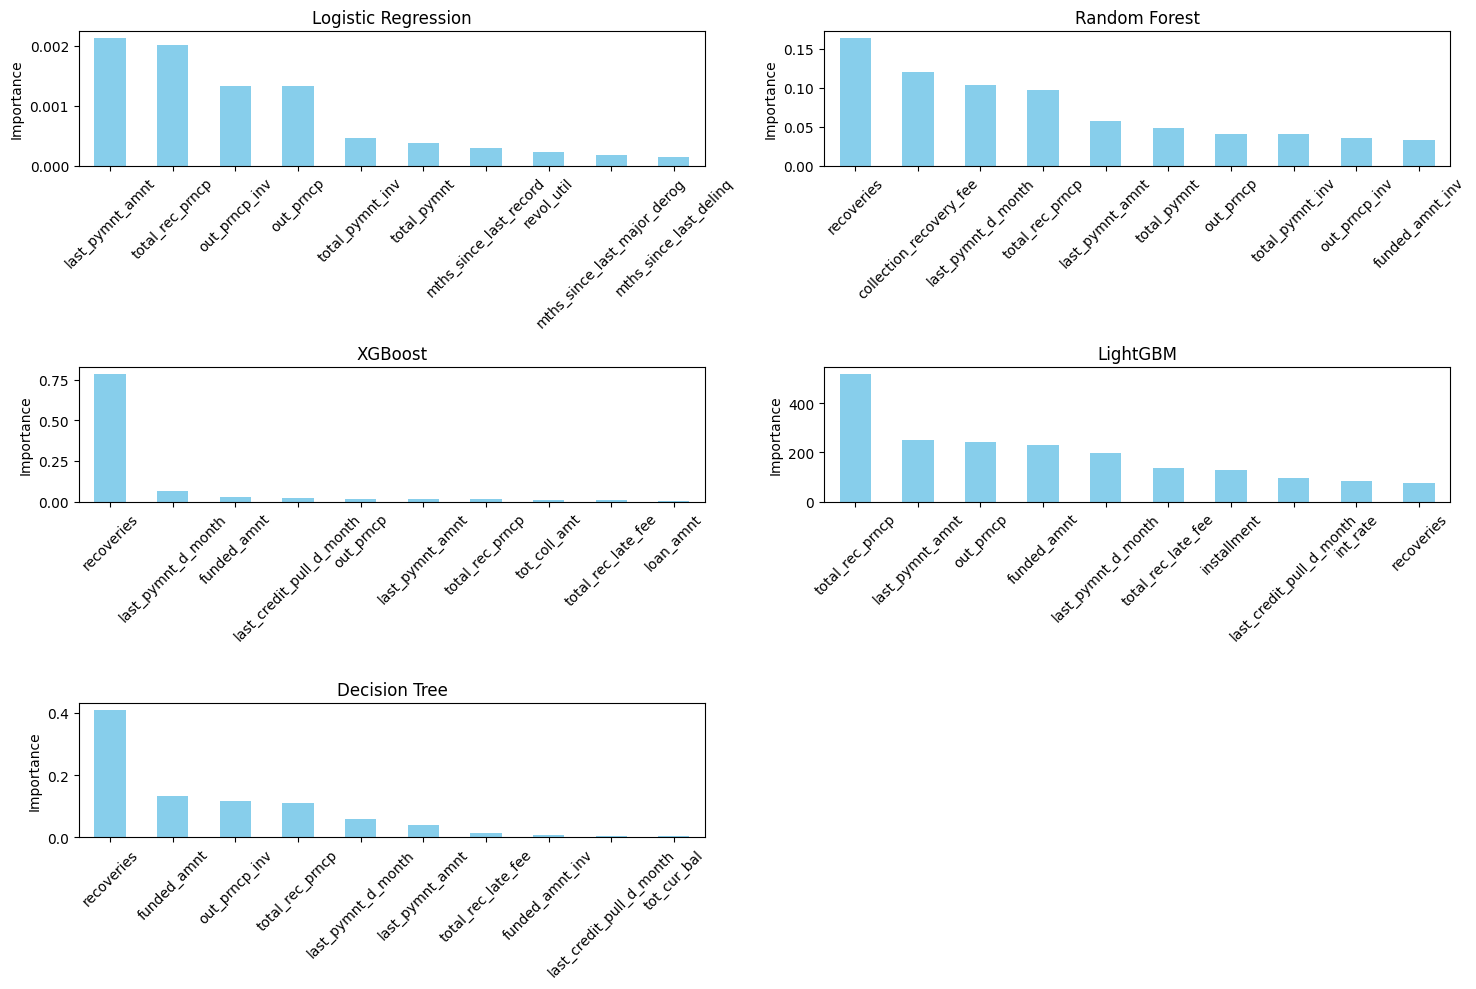

In [145]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
import xgboost as xgb
import lightgbm as lgb
from sklearn.tree import DecisionTreeClassifier

# Logistic Regression
model = LogisticRegression()
model.fit(X_train, y_train)
log_reg_importance = pd.Series(model.coef_[0], index=X_train.columns).sort_values(ascending=False)

# Random Forest
rf_model = RandomForestClassifier()
rf_model.fit(X_train, y_train)
rf_importance = pd.Series(rf_model.feature_importances_, index=X_train.columns).sort_values(ascending=False)

# XGBoost
xgb_model = xgb.XGBClassifier()
xgb_model.fit(X_train, y_train)
xgb_importance = pd.Series(xgb_model.feature_importances_, index=X_train.columns).sort_values(ascending=False)

# LightGBM
lgb_model = lgb.LGBMClassifier()
lgb_model.fit(X_train, y_train)
lgb_importance = pd.Series(lgb_model.feature_importances_, index=X_train.columns).sort_values(ascending=False)

# Decision Tree
dt_model = DecisionTreeClassifier()
dt_model.fit(X_train, y_train)
dt_importance = pd.Series(dt_model.feature_importances_, index=X_train.columns).sort_values(ascending=False)

# Visualisasi Feature Importance
models = ['Logistic Regression', 'Random Forest', 'XGBoost', 'LightGBM', 'Decision Tree']
importances = [log_reg_importance, rf_importance, xgb_importance, lgb_importance, dt_importance]

plt.figure(figsize=(15, 10))

for i, importance in enumerate(importances):
    plt.subplot(3, 2, i + 1)
    importance.head(10).plot(kind='bar', color='skyblue')
    plt.title(models[i])
    plt.ylabel('Importance')
    plt.xticks(rotation=45)

plt.tight_layout()
plt.show()